# NN cascade for URZ

* Radek Hofman, Jan 2018

### Imports and axiliary functions and stuff

In [1]:
%load_ext sql
%matplotlib inline

In [2]:
import os
import numpy
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
with open(os.path.join('/','home','hofman','.dbp.txt'), 'r') as f: password = f.read().strip()

In [4]:
query = "oracle://hofman:%s@mycelium.ctbto.org:1521/udb" % password
%sql $query

'Connected: hofman@udb'

In [5]:
% sql select count(*) from ml_features where sta='LPAZ'

0 rows affected.


COUNT(*)
406297


In [6]:
def plot(history):
    fig = plt.figure()
    ax = fig.add_subplot(211)
    ax.plot(history['acc'], label='acc')
    ax.plot(history['val_acc'], label='val_acc')
    ax.set_ylabel('accuracy')
    plt.legend(loc='best')
    ax = fig.add_subplot(212)
    ax.plot(history['loss'], label='loss')
    ax.plot(history['val_loss'], label='val_loss')
    plt.legend(loc='best')
    ax.set_xlabel('epoch')
    ax.set_ylabel('loss')

In [7]:
#load data from oracle do pandas
import cx_Oracle
connection = cx_Oracle.connect('hofman', password, 'udb')

### What is the misclassification rate now?

* #(iphase != phase) / (#automatic which are not noise) 

In [8]:
%sql select count(*) from ml_features where sta='URZ' and class_phase != class_iphase and class_iphase is not null

0 rows affected.


COUNT(*)
24018


In [9]:
#select from database required numbers
wrong_type = %sql select count(*) from ml_features where sta='URZ' and class_phase != class_iphase
total_number = %sql select count(*) from ml_features where sta='URZ' and phase!='N' and source!='M'

0 rows affected.
0 rows affected.


In [10]:
print('Percentage of misclassified initial wave types: %3.2f%%' % (wrong_type[0][0]/total_number[0][0]*100))

Percentage of misclassified initial wave types: 47.86%


### Dataframes per class phase type

In [11]:
query = """select * from ml_features where sta='URZ' and class_phase='regS'"""
df_S_all = pd.read_sql(query, con=connection)

In [12]:
df_S_all.head()

,ARID,STA,TIME,IPHASE,CLASS_IPHASE,PHASE,CLASS_PHASE,RETIME,SOURCE,PER,...,HMXMN,HVRATP,HVRAT,NAB,TAB,HTOV1,HTOV2,HTOV3,HTOV4,HTOV5
0,25050735,URZ,1.125386e+09,Sx,regS,Sn,regS,1.000,A,0.166667,...,1.526004,0.786459,1.174982,-0.1,-0.27,1.216724,0.363039,2.166968,1.844924,0.626604
1,25058004,URZ,1.125423e+09,Lg,regS,Sn,regS,1.925,A,0.444444,...,2.762988,15.337161,15.337161,-0.1,-0.31,0.423843,1.384683,0.724611,6.547078,1.569841
2,25075768,URZ,1.125508e+09,Lg,regS,Sn,regS,1.050,A,0.333333,...,1.395858,1.296030,2.398118,0.0,0.00,0.713705,1.641215,0.940403,1.211333,1.909713
3,25092371,URZ,1.125587e+09,Sn,regS,Sn,regS,0.175,A,0.166667,...,1.746398,5.561389,2.205452,0.0,0.00,1.155050,0.646231,0.997092,1.326985,4.507104
4,25094351,URZ,1.125598e+09,Sn,regS,Sn,regS,1.400,A,0.444444,...,2.816413,5.135686,8.557762,0.0,0.00,1.682028,0.309588,2.783780,8.199625,2.007485


In [13]:
query = """select * from ml_features where sta='URZ' and class_phase='regP'"""
df_P_all = pd.read_sql(query, con=connection)

In [14]:
df_P_all.head()

,ARID,STA,TIME,IPHASE,CLASS_IPHASE,PHASE,CLASS_PHASE,RETIME,SOURCE,PER,...,HMXMN,HVRATP,HVRAT,NAB,TAB,HTOV1,HTOV2,HTOV3,HTOV4,HTOV5
0,14972252,URZ,1.069735e+09,Pn,regP,Pn,regP,2.94244,A,0.166667,...,1.542596,0.124299,0.176237,0.1,0.100,0.509125,0.983261,0.619635,0.118464,0.058735
1,14992929,URZ,1.070059e+09,Pn,regP,Pn,regP,0.00000,A,0.333333,...,1.301846,1.112025,0.258914,0.2,0.245,3.730434,0.738458,0.704325,0.247701,0.060989
2,15029724,URZ,1.070386e+09,Pn,regP,Pn,regP,0.65000,A,0.166667,...,1.828008,0.132138,0.192003,0.2,0.375,0.629496,0.632947,0.277982,0.542543,0.041916
3,15031571,URZ,1.070403e+09,Pn,regP,Pn,regP,3.22500,A,0.444444,...,1.375773,0.282216,0.589090,0.1,0.050,0.924411,0.941318,0.304547,0.520954,0.131296
4,15073977,URZ,1.070752e+09,Pg,regP,Pn,regP,0.00000,A,0.166667,...,3.529159,0.085323,0.486815,0.1,0.290,0.211185,0.225393,0.257161,0.413598,0.287086


In [15]:
query = """select * from ml_features where sta='URZ' and class_phase='tele'"""
df_T_all = pd.read_sql(query, con=connection)

In [16]:
df_T_all.head()

,ARID,STA,TIME,IPHASE,CLASS_IPHASE,PHASE,CLASS_PHASE,RETIME,SOURCE,PER,...,HMXMN,HVRATP,HVRAT,NAB,TAB,HTOV1,HTOV2,HTOV3,HTOV4,HTOV5
0,28541585,URZ,1.143123e+09,P,tele,P,tele,0.550,A,0.666667,...,1.702892,0.042081,0.042081,0.0,0.000,0.467387,0.594238,0.057473,0.053682,0.463873
1,28556291,URZ,1.143197e+09,P,tele,P,tele,0.500,A,0.333333,...,1.957241,0.223522,0.223522,0.0,0.000,0.954016,0.705002,1.308694,0.193754,0.114283
2,28557837,URZ,1.143204e+09,P,tele,P,tele,3.100,A,0.333333,...,1.190828,0.240041,0.613747,0.0,-0.195,0.577677,1.020239,0.372745,0.277075,0.067225
3,28559193,URZ,1.143210e+09,P,tele,P,tele,0.000,A,0.333333,...,1.531207,0.084376,0.084376,0.1,0.130,0.689514,0.333741,0.336678,0.119060,0.092935
4,28561877,URZ,1.143223e+09,P,tele,P,tele,0.375,A,0.444444,...,2.808070,0.038871,0.097918,0.1,0.205,0.358785,0.042658,0.127151,0.064076,0.062188


In [17]:
query = """select * from ml_features where sta='URZ' and class_phase='N'"""
df_N_all = pd.read_sql(query, con=connection)

In [18]:
df_N_all.head()

,ARID,STA,TIME,IPHASE,CLASS_IPHASE,PHASE,CLASS_PHASE,RETIME,SOURCE,PER,...,HMXMN,HVRATP,HVRAT,NAB,TAB,HTOV1,HTOV2,HTOV3,HTOV4,HTOV5
0,13097443,URZ,1.055511e+09,N,N,None,N,0.0,A,0.166667,...,2.948945,9.600216,9.600216,0.0,0.00,0.396880,1.145887,0.421142,0.406116,1.439137
1,13097727,URZ,1.055513e+09,N,N,None,N,0.0,A,0.444444,...,5.750848,9.726424,3.211865,-0.1,-0.04,0.628241,0.617270,0.890586,2.788352,1.279634
2,13097728,URZ,1.055513e+09,N,N,None,N,0.0,A,1.000000,...,1.550819,0.163623,12.531935,0.1,0.50,2.625565,0.419386,0.502452,1.093746,0.228218
3,13097729,URZ,1.055513e+09,N,N,None,N,0.0,A,0.333333,...,2.203439,0.328290,0.511023,-0.1,-0.50,0.532591,1.455946,0.672186,0.730198,0.130826
4,13097946,URZ,1.055517e+09,N,N,None,N,0.0,A,1.000000,...,2.803004,0.827978,0.630203,0.0,0.00,1.039954,0.420590,0.983108,0.450562,0.274970


In [19]:
#save to csv
#df_ora.to_csv('URZ_pandas.csv')

In [20]:
#how much data we have
print('regS', df_S_all.shape)
print('regP', df_P_all.shape)
print('tele', df_T_all.shape)
print('noise', df_N_all.shape)

regS (11204, 25)
regP (11828, 25)
tele (38108, 25)
noise (308706, 25)


# Definition of input and output

In [21]:
# columns corresponding to input
x_indices = ['PER', 'RECT', 'PLANS', 'INANG1', 'INANG3', 'HMXMN', 'HVRATP', 'HVRAT', 'NAB', 'TAB',  
             'HTOV1', 'HTOV2', 'HTOV3', 'HTOV4', 'HTOV5']
print('features count:', len(x_indices))
# columns corresponding to output
y_indices = ['CLASS_PHASE']

features count: 15


# Dataset for first phase of the cascade: N vs TPS

In [22]:
#counts of all classes
ns = df_S_all.shape[0]
np = df_P_all.shape[0]
nt = df_T_all.shape[0]
nn = df_N_all.shape[0]

#those from automatic
nsa = df_S_all[df_S_all['SOURCE'] != 'M'].shape[0]
npa = df_P_all[df_P_all['SOURCE'] != 'M'].shape[0]
nta = df_T_all[df_T_all['SOURCE'] != 'M'].shape[0]
nna = df_N_all[df_N_all['SOURCE'] != 'M'].shape[0]

#we build a balanced datased - the same portion of regS, regP and tele
#we have this count of phases
samp_count = min(nsa, npa, nta)

#sample TPS dataset, random_state is a seed
ssS = df_S_all[df_S_all['SOURCE'] != 'M'].sample(samp_count, random_state=11)
ssP = df_P_all[df_P_all['SOURCE'] != 'M'].sample(samp_count)
ssT = df_T_all[df_T_all['SOURCE'] != 'M'].sample(samp_count)
TPS_data = pd.concat([ssS, ssP, ssT])

#sample noise phases
N_data = df_N_all[df_N_all['SOURCE'] != 'M'].sample(3*samp_count)

#lets shuffle dataset
TPS_data = TPS_data.sample(frac=1).reset_index(drop=True)
N_data = N_data.sample(frac=1).reset_index(drop=True)

print(ssS.shape, ssP.shape, ssT.shape)
print(TPS_data.shape)
print(N_data.shape)

(9202, 25) (9202, 25) (9202, 25)
(27606, 25)
(27606, 25)


### The same for manually added arrivals

In [25]:
import keras.utils

/dvlscratch/SHI/users/hofman/ML/env/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using Theano backend.


### Define train/test ratio

In [31]:
train_test_split_ratio = 0.75
samp_count_train = int(TPS_data.shape[0] * train_test_split_ratio)
samp_count_test = TPS_data.shape[0] - samp_count_train
print('train count=', samp_count_train, 'test count=', samp_count_test)

train count= 20704 test count= 6902


In [32]:
TPS_train = TPS_data[:samp_count_train]
TPS_test = TPS_data[samp_count_train:]

N_train = N_data[:samp_count_train]
N_test = N_data[samp_count_train:]

print('TPS train:',TPS_train.shape,'TPS test:',TPS_test.shape)
print('N train:  ',N_train.shape,  'N test:  ',N_test.shape)

TPS train: (20704, 25) TPS test: (6902, 25)
N train:   (20704, 25) N test:   (6902, 25)


### Check interclass balance of TPS

In [33]:
print('T in TPS train:   ', TPS_train[TPS_train['CLASS_PHASE']=='tele'].shape)
print('regP in TPS train:', TPS_train[TPS_train['CLASS_PHASE']=='regP'].shape)
print('regS in TPS train:', TPS_train[TPS_train['CLASS_PHASE']=='regS'].shape)

print('T in TPS test:    ', TPS_test[TPS_test['CLASS_PHASE']=='tele'].shape)
print('regP in TPS test: ', TPS_test[TPS_test['CLASS_PHASE']=='regP'].shape)
print('regS in TPS test: ', TPS_test[TPS_test['CLASS_PHASE']=='regS'].shape)

T in TPS train:    (6874, 25)
regP in TPS train: (6960, 25)
regS in TPS train: (6870, 25)
T in TPS test:     (2328, 25)
regP in TPS test:  (2242, 25)
regS in TPS test:  (2332, 25)


### Form train and test sets and shuffle

In [34]:
train = pd.concat([TPS_train, N_train]).sample(frac=1).reset_index(drop=True)
test =  pd.concat([TPS_test, N_test]).sample(frac=1).reset_index(drop=True)
#train.apply(pd.to_numeric, errors='ignore')
#test.apply(pd.to_numeric, errors='ignore')

### Extract features and class labels

In [139]:
train_X = train[x_indices].values.astype(float)
train_Y = train[y_indices]

test_X = test[x_indices].values.astype(float)
test_Y = test[y_indices]

train_Y_ = numpy.array(numpy.where(train_Y == 'N', 0, 1), dtype=float)
test_Y_ = numpy.array(numpy.where(test_Y == 'N', 0, 1), dtype=float)

#convert to categorical
train_Y = keras.utils.to_categorical(train_Y_)
test_Y = keras.utils.to_categorical(test_Y_)

print(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape)

(41408, 15) (41408, 2) (13804, 15) (13804, 2)


#### Ground truth for all 4 classes

In [225]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['N', 'regS', 'regP', 'tele'])
test_Y_GT = le.transform(test[y_indices])
train_Y_GT = le.transform(train[y_indices])
test_Y_GT[:20]

/dvlscratch/SHI/users/hofman/ML/env/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, 0, 0, 1, 2, 0, 1, 1, 0, 0, 3, 0, 0, 2, 1, 0, 0, 0])

# Neural network

In [36]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

In [37]:
n_input = len(x_indices)
numpy.random.seed(11)

# create model
model = Sequential()
model.add(Dense(n_input, input_dim=n_input, activation='sigmoid'))
model.add(Dense(6, activation='sigmoid'))
model.add(Dense(2, activation='sigmoid'))

sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True, clipnorm=1., clipvalue=0.5)
adam = Adam(lr=0.0001) #, clipnorm, clipvalue=0.5)

model.compile(
    loss = 'binary_crossentropy', 
    optimizer = 'adam',  # adam, sgd
    metrics = ['accuracy'])

In [38]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 96        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 14        
Total params: 350
Trainable params: 350
Non-trainable params: 0
_________________________________________________________________


In [39]:
hist_keys = ('acc', 'val_acc', 'loss', 'val_loss')

In [40]:
history = {k : [] for k in hist_keys}

In [41]:
h = model.fit(train_X[:], train_Y[:], 
          epochs=2000, 
          batch_size=32, 
          verbose=1,
          shuffle=True,
          #validation_split=0.1)
          validation_data=(test_X, test_Y))

history = {k : history[k] + h.history[k] for k in hist_keys}

Train on 41408 samples, validate on 13804 samples
Epoch 1/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.6442 - acc: 0.6316 - val_loss: 0.5943 - val_acc: 0.7071
Epoch 2/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.5479 - acc: 0.7339 - val_loss: 0.5019 - val_acc: 0.7653
Epoch 3/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.4844 - acc: 0.7698 - val_loss: 0.4603 - val_acc: 0.7878
Epoch 4/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.4530 - acc: 0.7893 - val_loss: 0.4416 - val_acc: 0.7985
Epoch 5/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.4371 - acc: 0.7971 - val_loss: 0.4233 - val_acc: 0.8091
Epoch 6/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.4293 - acc: 0.8023 - val_loss: 0.4221 - val_acc: 0.8052
Epoch 7/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.4239 - acc: 0.8059 - val_loss: 0.

41408/41408 [==============================] - 1s 21us/step - loss: 0.3674 - acc: 0.8320 - val_loss: 0.3614 - val_acc: 0.8361
Epoch 60/2000
41408/41408 [==============================] - 1s 21us/step - loss: 0.3690 - acc: 0.8318 - val_loss: 0.3597 - val_acc: 0.8375
Epoch 61/2000
41408/41408 [==============================] - 1s 21us/step - loss: 0.3678 - acc: 0.8339 - val_loss: 0.3628 - val_acc: 0.8359
Epoch 62/2000
41408/41408 [==============================] - 1s 21us/step - loss: 0.3689 - acc: 0.8321 - val_loss: 0.3609 - val_acc: 0.8368
Epoch 63/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.3666 - acc: 0.8334 - val_loss: 0.3641 - val_acc: 0.8364
Epoch 64/2000
41408/41408 [==============================] - 1s 21us/step - loss: 0.3666 - acc: 0.8343 - val_loss: 0.3619 - val_acc: 0.8367
Epoch 65/2000
41408/41408 [==============================] - 1s 21us/step - loss: 0.3674 - acc: 0.8328 - val_loss: 0.3658 - val_acc: 0.8300
Epoch 66/2000
41408/41408 [=======

41408/41408 [==============================] - 1s 22us/step - loss: 0.3611 - acc: 0.8369 - val_loss: 0.3619 - val_acc: 0.8344
Epoch 118/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.3616 - acc: 0.8352 - val_loss: 0.3555 - val_acc: 0.8402
Epoch 119/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.3624 - acc: 0.8347 - val_loss: 0.3573 - val_acc: 0.8409
Epoch 120/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.3614 - acc: 0.8354 - val_loss: 0.3536 - val_acc: 0.8404
Epoch 121/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3609 - acc: 0.8358 - val_loss: 0.3556 - val_acc: 0.8409
Epoch 122/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3616 - acc: 0.8358 - val_loss: 0.3583 - val_acc: 0.8383
Epoch 123/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.3611 - acc: 0.8358 - val_loss: 0.3560 - val_acc: 0.8401
Epoch 124/2000
41408/41408 [

41408/41408 [==============================] - 1s 21us/step - loss: 0.3579 - acc: 0.8371 - val_loss: 0.3548 - val_acc: 0.8415
Epoch 176/2000
41408/41408 [==============================] - 1s 21us/step - loss: 0.3583 - acc: 0.8369 - val_loss: 0.3565 - val_acc: 0.8378
Epoch 177/2000
41408/41408 [==============================] - 1s 21us/step - loss: 0.3572 - acc: 0.8371 - val_loss: 0.3522 - val_acc: 0.8435
Epoch 178/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.3582 - acc: 0.8376 - val_loss: 0.3537 - val_acc: 0.8426
Epoch 179/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.3581 - acc: 0.8380 - val_loss: 0.3599 - val_acc: 0.8387
Epoch 180/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.3575 - acc: 0.8390 - val_loss: 0.3628 - val_acc: 0.8370
Epoch 181/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.3575 - acc: 0.8374 - val_loss: 0.3607 - val_acc: 0.8374
Epoch 182/2000
41408/41408 [

41408/41408 [==============================] - 1s 22us/step - loss: 0.3541 - acc: 0.8402 - val_loss: 0.3516 - val_acc: 0.8440
Epoch 234/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3546 - acc: 0.8393 - val_loss: 0.3504 - val_acc: 0.8421
Epoch 235/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.3541 - acc: 0.8408 - val_loss: 0.3540 - val_acc: 0.8405
Epoch 236/2000
41408/41408 [==============================] - 1s 24us/step - loss: 0.3539 - acc: 0.8397 - val_loss: 0.3533 - val_acc: 0.8421
Epoch 237/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3535 - acc: 0.8396 - val_loss: 0.3519 - val_acc: 0.8424
Epoch 238/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3537 - acc: 0.8398 - val_loss: 0.3545 - val_acc: 0.8395
Epoch 239/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3542 - acc: 0.8403 - val_loss: 0.3580 - val_acc: 0.8388
Epoch 240/2000
41408/41408 [

41408/41408 [==============================] - 1s 22us/step - loss: 0.3512 - acc: 0.8422 - val_loss: 0.3528 - val_acc: 0.8415
Epoch 292/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3517 - acc: 0.8415 - val_loss: 0.3522 - val_acc: 0.8428
Epoch 293/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3517 - acc: 0.8403 - val_loss: 0.3593 - val_acc: 0.8371
Epoch 294/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.3519 - acc: 0.8412 - val_loss: 0.3516 - val_acc: 0.8425
Epoch 295/2000
41408/41408 [==============================] - 1s 21us/step - loss: 0.3514 - acc: 0.8410 - val_loss: 0.3511 - val_acc: 0.8428
Epoch 296/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.3513 - acc: 0.8416 - val_loss: 0.3541 - val_acc: 0.8398
Epoch 297/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.3515 - acc: 0.8408 - val_loss: 0.3555 - val_acc: 0.8416
Epoch 298/2000
41408/41408 [

41408/41408 [==============================] - 1s 22us/step - loss: 0.3501 - acc: 0.8424 - val_loss: 0.3541 - val_acc: 0.8411
Epoch 350/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.3500 - acc: 0.8413 - val_loss: 0.3490 - val_acc: 0.8450
Epoch 351/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.3504 - acc: 0.8414 - val_loss: 0.3511 - val_acc: 0.8421
Epoch 352/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.3499 - acc: 0.8427 - val_loss: 0.3536 - val_acc: 0.8420
Epoch 353/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.3497 - acc: 0.8418 - val_loss: 0.3509 - val_acc: 0.8444
Epoch 354/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3504 - acc: 0.8432 - val_loss: 0.3539 - val_acc: 0.8413
Epoch 355/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.3496 - acc: 0.8411 - val_loss: 0.3539 - val_acc: 0.8417
Epoch 356/2000
41408/41408 [

41408/41408 [==============================] - 1s 23us/step - loss: 0.3482 - acc: 0.8429 - val_loss: 0.3493 - val_acc: 0.8443
Epoch 408/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3488 - acc: 0.8429 - val_loss: 0.3520 - val_acc: 0.8430
Epoch 409/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.3480 - acc: 0.8447 - val_loss: 0.3506 - val_acc: 0.8435
Epoch 410/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.3489 - acc: 0.8432 - val_loss: 0.3490 - val_acc: 0.8441
Epoch 411/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.3488 - acc: 0.8437 - val_loss: 0.3475 - val_acc: 0.8457
Epoch 412/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3488 - acc: 0.8429 - val_loss: 0.3483 - val_acc: 0.8448
Epoch 413/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3486 - acc: 0.8448 - val_loss: 0.3518 - val_acc: 0.8415
Epoch 414/2000
41408/41408 [

41408/41408 [==============================] - 1s 22us/step - loss: 0.3478 - acc: 0.8434 - val_loss: 0.3670 - val_acc: 0.8347
Epoch 466/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3482 - acc: 0.8439 - val_loss: 0.3502 - val_acc: 0.8427
Epoch 467/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.3479 - acc: 0.8428 - val_loss: 0.3518 - val_acc: 0.8416
Epoch 468/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3481 - acc: 0.8434 - val_loss: 0.3496 - val_acc: 0.8435
Epoch 469/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3476 - acc: 0.8436 - val_loss: 0.3473 - val_acc: 0.8432
Epoch 470/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.3479 - acc: 0.8448 - val_loss: 0.3513 - val_acc: 0.8425
Epoch 471/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.3476 - acc: 0.8428 - val_loss: 0.3504 - val_acc: 0.8419
Epoch 472/2000
41408/41408 [

41408/41408 [==============================] - 1s 22us/step - loss: 0.3472 - acc: 0.8450 - val_loss: 0.3512 - val_acc: 0.8436
Epoch 524/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.3473 - acc: 0.8447 - val_loss: 0.3478 - val_acc: 0.8447
Epoch 525/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.3469 - acc: 0.8433 - val_loss: 0.3580 - val_acc: 0.8392
Epoch 526/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.3475 - acc: 0.8445 - val_loss: 0.3513 - val_acc: 0.8425
Epoch 527/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.3470 - acc: 0.8447 - val_loss: 0.3495 - val_acc: 0.8427
Epoch 528/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.3481 - acc: 0.8445 - val_loss: 0.3485 - val_acc: 0.8446
Epoch 529/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.3485 - acc: 0.8436 - val_loss: 0.3502 - val_acc: 0.8429
Epoch 530/2000
41408/41408 [

41408/41408 [==============================] - 1s 23us/step - loss: 0.3462 - acc: 0.8451 - val_loss: 0.3483 - val_acc: 0.8438
Epoch 582/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3471 - acc: 0.8438 - val_loss: 0.3466 - val_acc: 0.8431
Epoch 583/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3462 - acc: 0.8439 - val_loss: 0.3460 - val_acc: 0.8456
Epoch 584/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3465 - acc: 0.8437 - val_loss: 0.3478 - val_acc: 0.8441
Epoch 585/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3465 - acc: 0.8448 - val_loss: 0.3458 - val_acc: 0.8463
Epoch 586/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.3460 - acc: 0.8457 - val_loss: 0.3454 - val_acc: 0.8468
Epoch 587/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3468 - acc: 0.8434 - val_loss: 0.3474 - val_acc: 0.8451
Epoch 588/2000
41408/41408 [

41408/41408 [==============================] - 1s 22us/step - loss: 0.3460 - acc: 0.8446 - val_loss: 0.3592 - val_acc: 0.8376
Epoch 640/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.3460 - acc: 0.8450 - val_loss: 0.3490 - val_acc: 0.8452
Epoch 641/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.3452 - acc: 0.8448 - val_loss: 0.3516 - val_acc: 0.8414
Epoch 642/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.3455 - acc: 0.8429 - val_loss: 0.3442 - val_acc: 0.8474
Epoch 643/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.3454 - acc: 0.8441 - val_loss: 0.3468 - val_acc: 0.8459
Epoch 644/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3454 - acc: 0.8444 - val_loss: 0.3473 - val_acc: 0.8453
Epoch 645/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3453 - acc: 0.8444 - val_loss: 0.3476 - val_acc: 0.8456
Epoch 646/2000
41408/41408 [

41408/41408 [==============================] - 1s 22us/step - loss: 0.3451 - acc: 0.8436 - val_loss: 0.3514 - val_acc: 0.8426
Epoch 698/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3444 - acc: 0.8444 - val_loss: 0.3472 - val_acc: 0.8456
Epoch 699/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3441 - acc: 0.8446 - val_loss: 0.3530 - val_acc: 0.8408
Epoch 700/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3442 - acc: 0.8443 - val_loss: 0.3469 - val_acc: 0.8450
Epoch 701/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.3443 - acc: 0.8455 - val_loss: 0.3483 - val_acc: 0.8434
Epoch 702/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.3442 - acc: 0.8452 - val_loss: 0.3508 - val_acc: 0.8440
Epoch 703/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.3443 - acc: 0.8455 - val_loss: 0.3478 - val_acc: 0.8454
Epoch 704/2000
41408/41408 [

41408/41408 [==============================] - 1s 23us/step - loss: 0.3441 - acc: 0.8456 - val_loss: 0.3461 - val_acc: 0.8448
Epoch 756/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3441 - acc: 0.8460 - val_loss: 0.3441 - val_acc: 0.8460
Epoch 757/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3446 - acc: 0.8450 - val_loss: 0.3518 - val_acc: 0.8432
Epoch 758/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.3441 - acc: 0.8463 - val_loss: 0.3446 - val_acc: 0.8474
Epoch 759/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3438 - acc: 0.8445 - val_loss: 0.3516 - val_acc: 0.8419
Epoch 760/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3437 - acc: 0.8451 - val_loss: 0.3491 - val_acc: 0.8438
Epoch 761/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.3437 - acc: 0.8460 - val_loss: 0.3459 - val_acc: 0.8457
Epoch 762/2000
41408/41408 [

41408/41408 [==============================] - 1s 22us/step - loss: 0.3435 - acc: 0.8445 - val_loss: 0.3455 - val_acc: 0.8454
Epoch 814/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.3440 - acc: 0.8457 - val_loss: 0.3483 - val_acc: 0.8444
Epoch 815/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3435 - acc: 0.8446 - val_loss: 0.3479 - val_acc: 0.8427
Epoch 816/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3432 - acc: 0.8462 - val_loss: 0.3461 - val_acc: 0.8475
Epoch 817/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3437 - acc: 0.8460 - val_loss: 0.3455 - val_acc: 0.8469
Epoch 818/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3438 - acc: 0.8452 - val_loss: 0.3487 - val_acc: 0.8450
Epoch 819/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3435 - acc: 0.8452 - val_loss: 0.3453 - val_acc: 0.8467
Epoch 820/2000
41408/41408 [

41408/41408 [==============================] - 1s 22us/step - loss: 0.3426 - acc: 0.8467 - val_loss: 0.3475 - val_acc: 0.8444
Epoch 872/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.3429 - acc: 0.8456 - val_loss: 0.3468 - val_acc: 0.8446
Epoch 873/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3415 - acc: 0.8473 - val_loss: 0.3477 - val_acc: 0.8454
Epoch 874/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3430 - acc: 0.8457 - val_loss: 0.3456 - val_acc: 0.8471
Epoch 875/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3429 - acc: 0.8469 - val_loss: 0.3439 - val_acc: 0.8489
Epoch 876/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3422 - acc: 0.8472 - val_loss: 0.3474 - val_acc: 0.8468
Epoch 877/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.3420 - acc: 0.8466 - val_loss: 0.3458 - val_acc: 0.8460
Epoch 878/2000
41408/41408 [

41408/41408 [==============================] - 1s 23us/step - loss: 0.3426 - acc: 0.8460 - val_loss: 0.3510 - val_acc: 0.8422
Epoch 930/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3417 - acc: 0.8471 - val_loss: 0.3503 - val_acc: 0.8448
Epoch 931/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3424 - acc: 0.8462 - val_loss: 0.3459 - val_acc: 0.8476
Epoch 932/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3424 - acc: 0.8463 - val_loss: 0.3467 - val_acc: 0.8457
Epoch 933/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3414 - acc: 0.8473 - val_loss: 0.3477 - val_acc: 0.8446
Epoch 934/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3420 - acc: 0.8468 - val_loss: 0.3459 - val_acc: 0.8477
Epoch 935/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3417 - acc: 0.8470 - val_loss: 0.3464 - val_acc: 0.8456
Epoch 936/2000
41408/41408 [

41408/41408 [==============================] - 1s 23us/step - loss: 0.3424 - acc: 0.8466 - val_loss: 0.3463 - val_acc: 0.8471
Epoch 988/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3421 - acc: 0.8466 - val_loss: 0.3459 - val_acc: 0.8474
Epoch 989/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3424 - acc: 0.8468 - val_loss: 0.3499 - val_acc: 0.8456
Epoch 990/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3426 - acc: 0.8466 - val_loss: 0.3452 - val_acc: 0.8458
Epoch 991/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3428 - acc: 0.8459 - val_loss: 0.3468 - val_acc: 0.8453
Epoch 992/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3423 - acc: 0.8458 - val_loss: 0.3487 - val_acc: 0.8450
Epoch 993/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3414 - acc: 0.8465 - val_loss: 0.3484 - val_acc: 0.8464
Epoch 994/2000
41408/41408 [

Epoch 1045/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.3422 - acc: 0.8467 - val_loss: 0.3464 - val_acc: 0.8454
Epoch 1046/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.3417 - acc: 0.8455 - val_loss: 0.3483 - val_acc: 0.8435
Epoch 1047/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.3417 - acc: 0.8478 - val_loss: 0.3460 - val_acc: 0.8471
Epoch 1048/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.3419 - acc: 0.8460 - val_loss: 0.3463 - val_acc: 0.8471
Epoch 1049/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3417 - acc: 0.8460 - val_loss: 0.3438 - val_acc: 0.8473
Epoch 1050/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.3413 - acc: 0.8461 - val_loss: 0.3466 - val_acc: 0.8445
Epoch 1051/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3418 - acc: 0.8467 - val_loss: 0.3459 - val_acc: 0.8477
Epoch 

41408/41408 [==============================] - 1s 23us/step - loss: 0.3417 - acc: 0.8469 - val_loss: 0.3486 - val_acc: 0.8474
Epoch 1103/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3408 - acc: 0.8482 - val_loss: 0.3477 - val_acc: 0.8470
Epoch 1104/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3416 - acc: 0.8466 - val_loss: 0.3466 - val_acc: 0.8466
Epoch 1105/2000
41408/41408 [==============================] - 1s 24us/step - loss: 0.3407 - acc: 0.8469 - val_loss: 0.3454 - val_acc: 0.8469
Epoch 1106/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3407 - acc: 0.8481 - val_loss: 0.3511 - val_acc: 0.8431
Epoch 1107/2000
41408/41408 [==============================] - 1s 24us/step - loss: 0.3419 - acc: 0.8469 - val_loss: 0.3443 - val_acc: 0.8477
Epoch 1108/2000
41408/41408 [==============================] - 1s 24us/step - loss: 0.3414 - acc: 0.8462 - val_loss: 0.3444 - val_acc: 0.8469
Epoch 1109/2000
41408/

Epoch 1160/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3422 - acc: 0.8466 - val_loss: 0.3471 - val_acc: 0.8460
Epoch 1161/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3416 - acc: 0.8470 - val_loss: 0.3451 - val_acc: 0.8479
Epoch 1162/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3417 - acc: 0.8467 - val_loss: 0.3433 - val_acc: 0.8476
Epoch 1163/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.3419 - acc: 0.8463 - val_loss: 0.3466 - val_acc: 0.8444
Epoch 1164/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3416 - acc: 0.8461 - val_loss: 0.3488 - val_acc: 0.8424
Epoch 1165/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3420 - acc: 0.8455 - val_loss: 0.3455 - val_acc: 0.8450
Epoch 1166/2000
41408/41408 [==============================] - 1s 24us/step - loss: 0.3414 - acc: 0.8458 - val_loss: 0.3475 - val_acc: 0.8447
Epoch 

41408/41408 [==============================] - 1s 23us/step - loss: 0.3409 - acc: 0.8471 - val_loss: 0.3470 - val_acc: 0.8466
Epoch 1218/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3410 - acc: 0.8472 - val_loss: 0.3465 - val_acc: 0.8473
Epoch 1219/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3416 - acc: 0.8460 - val_loss: 0.3457 - val_acc: 0.8485
Epoch 1220/2000
41408/41408 [==============================] - 1s 24us/step - loss: 0.3410 - acc: 0.8478 - val_loss: 0.3441 - val_acc: 0.8490
Epoch 1221/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3411 - acc: 0.8469 - val_loss: 0.3452 - val_acc: 0.8440
Epoch 1222/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3409 - acc: 0.8479 - val_loss: 0.3514 - val_acc: 0.8453
Epoch 1223/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3408 - acc: 0.8465 - val_loss: 0.3442 - val_acc: 0.8480
Epoch 1224/2000
41408/

Epoch 1275/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3408 - acc: 0.8469 - val_loss: 0.3507 - val_acc: 0.8411
Epoch 1276/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3406 - acc: 0.8470 - val_loss: 0.3464 - val_acc: 0.8461
Epoch 1277/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3407 - acc: 0.8465 - val_loss: 0.3449 - val_acc: 0.8476
Epoch 1278/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3410 - acc: 0.8463 - val_loss: 0.3446 - val_acc: 0.8474
Epoch 1279/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3409 - acc: 0.8466 - val_loss: 0.3471 - val_acc: 0.8462
Epoch 1280/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3408 - acc: 0.8488 - val_loss: 0.3467 - val_acc: 0.8451
Epoch 1281/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3405 - acc: 0.8469 - val_loss: 0.3513 - val_acc: 0.8426
Epoch 

41408/41408 [==============================] - 1s 24us/step - loss: 0.3408 - acc: 0.8465 - val_loss: 0.3538 - val_acc: 0.8423
Epoch 1333/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3409 - acc: 0.8478 - val_loss: 0.3456 - val_acc: 0.8462
Epoch 1334/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3405 - acc: 0.8467 - val_loss: 0.3512 - val_acc: 0.8399
Epoch 1335/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3403 - acc: 0.8473 - val_loss: 0.3479 - val_acc: 0.8447
Epoch 1336/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3405 - acc: 0.8482 - val_loss: 0.3474 - val_acc: 0.8473
Epoch 1337/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3406 - acc: 0.8473 - val_loss: 0.3452 - val_acc: 0.8472
Epoch 1338/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3412 - acc: 0.8482 - val_loss: 0.3468 - val_acc: 0.8448
Epoch 1339/2000
41408/

Epoch 1390/2000
41408/41408 [==============================] - 1s 24us/step - loss: 0.3402 - acc: 0.8471 - val_loss: 0.3457 - val_acc: 0.8469
Epoch 1391/2000
41408/41408 [==============================] - 1s 24us/step - loss: 0.3408 - acc: 0.8474 - val_loss: 0.3443 - val_acc: 0.8476
Epoch 1392/2000
41408/41408 [==============================] - 1s 24us/step - loss: 0.3407 - acc: 0.8479 - val_loss: 0.3441 - val_acc: 0.8496
Epoch 1393/2000
41408/41408 [==============================] - 1s 24us/step - loss: 0.3409 - acc: 0.8466 - val_loss: 0.3438 - val_acc: 0.8474
Epoch 1394/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3406 - acc: 0.8479 - val_loss: 0.3448 - val_acc: 0.8466
Epoch 1395/2000
41408/41408 [==============================] - 1s 24us/step - loss: 0.3403 - acc: 0.8472 - val_loss: 0.3458 - val_acc: 0.8463
Epoch 1396/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3405 - acc: 0.8471 - val_loss: 0.3432 - val_acc: 0.8478
Epoch 

41408/41408 [==============================] - 1s 23us/step - loss: 0.3401 - acc: 0.8473 - val_loss: 0.3451 - val_acc: 0.8463
Epoch 1448/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3408 - acc: 0.8469 - val_loss: 0.3430 - val_acc: 0.8485
Epoch 1449/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.3408 - acc: 0.8473 - val_loss: 0.3454 - val_acc: 0.8466
Epoch 1450/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.3400 - acc: 0.8472 - val_loss: 0.3438 - val_acc: 0.8486
Epoch 1451/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3410 - acc: 0.8451 - val_loss: 0.3455 - val_acc: 0.8453
Epoch 1452/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3410 - acc: 0.8470 - val_loss: 0.3469 - val_acc: 0.8445
Epoch 1453/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3397 - acc: 0.8472 - val_loss: 0.3518 - val_acc: 0.8422
Epoch 1454/2000
41408/

Epoch 1505/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3406 - acc: 0.8460 - val_loss: 0.3457 - val_acc: 0.8443
Epoch 1506/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.3405 - acc: 0.8469 - val_loss: 0.3450 - val_acc: 0.8463
Epoch 1507/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3404 - acc: 0.8474 - val_loss: 0.3495 - val_acc: 0.8430
Epoch 1508/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.3401 - acc: 0.8470 - val_loss: 0.3468 - val_acc: 0.8442
Epoch 1509/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.3404 - acc: 0.8466 - val_loss: 0.3463 - val_acc: 0.8460
Epoch 1510/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.3404 - acc: 0.8471 - val_loss: 0.3460 - val_acc: 0.8450
Epoch 1511/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.3402 - acc: 0.8475 - val_loss: 0.3451 - val_acc: 0.8466
Epoch 

41408/41408 [==============================] - 1s 22us/step - loss: 0.3405 - acc: 0.8474 - val_loss: 0.3456 - val_acc: 0.8445
Epoch 1563/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3403 - acc: 0.8476 - val_loss: 0.3492 - val_acc: 0.8414
Epoch 1564/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3402 - acc: 0.8476 - val_loss: 0.3486 - val_acc: 0.8459
Epoch 1565/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3406 - acc: 0.8461 - val_loss: 0.3460 - val_acc: 0.8464
Epoch 1566/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3399 - acc: 0.8474 - val_loss: 0.3460 - val_acc: 0.8452
Epoch 1567/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3401 - acc: 0.8469 - val_loss: 0.3529 - val_acc: 0.8455
Epoch 1568/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3398 - acc: 0.8473 - val_loss: 0.3525 - val_acc: 0.8414
Epoch 1569/2000
41408/

Epoch 1620/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.3400 - acc: 0.8475 - val_loss: 0.3494 - val_acc: 0.8432
Epoch 1621/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3401 - acc: 0.8481 - val_loss: 0.3483 - val_acc: 0.8434
Epoch 1622/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3403 - acc: 0.8473 - val_loss: 0.3451 - val_acc: 0.8460
Epoch 1623/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3396 - acc: 0.8477 - val_loss: 0.3462 - val_acc: 0.8456
Epoch 1624/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3412 - acc: 0.8470 - val_loss: 0.3448 - val_acc: 0.8482
Epoch 1625/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3406 - acc: 0.8472 - val_loss: 0.3471 - val_acc: 0.8459
Epoch 1626/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3401 - acc: 0.8478 - val_loss: 0.3454 - val_acc: 0.8467
Epoch 

41408/41408 [==============================] - 1s 23us/step - loss: 0.3396 - acc: 0.8484 - val_loss: 0.3451 - val_acc: 0.8462
Epoch 1678/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3396 - acc: 0.8473 - val_loss: 0.3455 - val_acc: 0.8459
Epoch 1679/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3396 - acc: 0.8475 - val_loss: 0.3451 - val_acc: 0.8448
Epoch 1680/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3396 - acc: 0.8476 - val_loss: 0.3455 - val_acc: 0.8446
Epoch 1681/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3393 - acc: 0.8473 - val_loss: 0.3450 - val_acc: 0.8463
Epoch 1682/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3397 - acc: 0.8478 - val_loss: 0.3475 - val_acc: 0.8456
Epoch 1683/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3392 - acc: 0.8473 - val_loss: 0.3485 - val_acc: 0.8443
Epoch 1684/2000
41408/

Epoch 1735/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3386 - acc: 0.8477 - val_loss: 0.3475 - val_acc: 0.8444
Epoch 1736/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3392 - acc: 0.8489 - val_loss: 0.3475 - val_acc: 0.8425
Epoch 1737/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3392 - acc: 0.8491 - val_loss: 0.3457 - val_acc: 0.8442
Epoch 1738/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3391 - acc: 0.8482 - val_loss: 0.3477 - val_acc: 0.8424
Epoch 1739/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3385 - acc: 0.8482 - val_loss: 0.3454 - val_acc: 0.8453
Epoch 1740/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3397 - acc: 0.8481 - val_loss: 0.3440 - val_acc: 0.8478
Epoch 1741/2000
41408/41408 [==============================] - 1s 25us/step - loss: 0.3390 - acc: 0.8473 - val_loss: 0.3498 - val_acc: 0.8433
Epoch 

41408/41408 [==============================] - 1s 23us/step - loss: 0.3390 - acc: 0.8478 - val_loss: 0.3463 - val_acc: 0.8456
Epoch 1793/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3385 - acc: 0.8481 - val_loss: 0.3460 - val_acc: 0.8434
Epoch 1794/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.3387 - acc: 0.8492 - val_loss: 0.3470 - val_acc: 0.8440
Epoch 1795/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.3388 - acc: 0.8487 - val_loss: 0.3460 - val_acc: 0.8448
Epoch 1796/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.3389 - acc: 0.8470 - val_loss: 0.3482 - val_acc: 0.8438
Epoch 1797/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.3385 - acc: 0.8477 - val_loss: 0.3463 - val_acc: 0.8458
Epoch 1798/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3389 - acc: 0.8480 - val_loss: 0.3445 - val_acc: 0.8456
Epoch 1799/2000
41408/

Epoch 1850/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3385 - acc: 0.8485 - val_loss: 0.3448 - val_acc: 0.8445
Epoch 1851/2000
41408/41408 [==============================] - 1s 25us/step - loss: 0.3389 - acc: 0.8472 - val_loss: 0.3458 - val_acc: 0.8463
Epoch 1852/2000
41408/41408 [==============================] - 1s 24us/step - loss: 0.3390 - acc: 0.8477 - val_loss: 0.3450 - val_acc: 0.8448
Epoch 1853/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3384 - acc: 0.8482 - val_loss: 0.3473 - val_acc: 0.8433
Epoch 1854/2000
41408/41408 [==============================] - 1s 24us/step - loss: 0.3385 - acc: 0.8486 - val_loss: 0.3498 - val_acc: 0.8424
Epoch 1855/2000
41408/41408 [==============================] - 1s 25us/step - loss: 0.3390 - acc: 0.8488 - val_loss: 0.3494 - val_acc: 0.8421
Epoch 1856/2000
41408/41408 [==============================] - 1s 24us/step - loss: 0.3387 - acc: 0.8476 - val_loss: 0.3510 - val_acc: 0.8427
Epoch 

41408/41408 [==============================] - 1s 23us/step - loss: 0.3379 - acc: 0.8494 - val_loss: 0.3461 - val_acc: 0.8459
Epoch 1908/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3380 - acc: 0.8494 - val_loss: 0.3504 - val_acc: 0.8417
Epoch 1909/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.3391 - acc: 0.8477 - val_loss: 0.3475 - val_acc: 0.8428
Epoch 1910/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3385 - acc: 0.8489 - val_loss: 0.3437 - val_acc: 0.8466
Epoch 1911/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3392 - acc: 0.8478 - val_loss: 0.3442 - val_acc: 0.8461
Epoch 1912/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.3379 - acc: 0.8479 - val_loss: 0.3456 - val_acc: 0.8435
Epoch 1913/2000
41408/41408 [==============================] - 1s 22us/step - loss: 0.3385 - acc: 0.8477 - val_loss: 0.3453 - val_acc: 0.8448
Epoch 1914/2000
41408/

Epoch 1965/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3391 - acc: 0.8481 - val_loss: 0.3454 - val_acc: 0.8450
Epoch 1966/2000
41408/41408 [==============================] - 1s 24us/step - loss: 0.3393 - acc: 0.8487 - val_loss: 0.3475 - val_acc: 0.8445
Epoch 1967/2000
41408/41408 [==============================] - 1s 24us/step - loss: 0.3394 - acc: 0.8474 - val_loss: 0.3450 - val_acc: 0.8448
Epoch 1968/2000
41408/41408 [==============================] - 1s 24us/step - loss: 0.3385 - acc: 0.8484 - val_loss: 0.3436 - val_acc: 0.8464
Epoch 1969/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3384 - acc: 0.8483 - val_loss: 0.3446 - val_acc: 0.8476
Epoch 1970/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3388 - acc: 0.8484 - val_loss: 0.3462 - val_acc: 0.8451
Epoch 1971/2000
41408/41408 [==============================] - 1s 23us/step - loss: 0.3384 - acc: 0.8487 - val_loss: 0.3520 - val_acc: 0.8416
Epoch 

In [ ]:
train_Y[train_Y==0].shape, train_Y[train_Y==1].shape
test_Y[test_Y==0].shape, test_Y[test_Y==1].shape

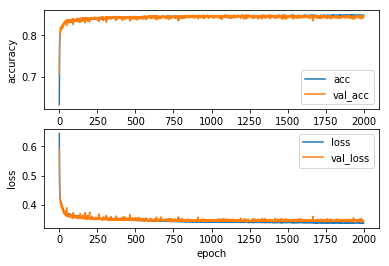

In [44]:
plot(history)

In [45]:
# calculate predicted values
Y_pred_ = model.predict(test_X)
# predictions are outputted as floats from [0,1]
print(Y_pred_[:10])

[[9.7410142e-01 2.5898589e-02]
 [9.7761589e-01 2.2384083e-02]
 [9.7797078e-01 2.2029223e-02]
 [5.2552408e-01 4.7447595e-01]
 [8.1728786e-01 1.8271212e-01]
 [2.8420327e-02 9.7157967e-01]
 [1.0399166e-01 8.9600837e-01]
 [9.7105443e-01 2.8945554e-02]
 [1.0137895e-04 9.9989861e-01]
 [8.2810514e-04 9.9917191e-01]]


In [46]:
Y_pred = numpy.argmax(Y_pred_, axis=1)

In [47]:
from sklearn.metrics import confusion_matrix

# we must translate it to 0, 1 based on thresholding at 0.5
# where < 0.5 set to 0, to 1 otherwise
Y_pred = numpy.where(Y_pred < 0.5, 0, 1)

# calculate confusion matrix
conf_mat = confusion_matrix(test_Y_, Y_pred)
print(conf_mat)

[[5697 1205]
 [ 965 5937]]


In [133]:
#eval on test data
model.evaluate(test_X, test_Y)

6902/6902 [==============================] - 0s 8us/step


[0.3273585427372188, 0.8601854534399264]

In [136]:
model.evaluate(train_X, train_Y)

41408/41408 [==============================] - 0s 8us/step


[0.33733608502278556, 0.8480245363214838]

In [50]:
#save model and weights
model.save('URZ_model_NTPS.h5')

## Adaptive step of the training

* let's remove those training samples which are classified as noise by analysts but NN says the are real arrivals - could be a small arrivals omited by analysts

#### Confusion matrix before removal of noise classified as signal from train set

In [ ]:
#adaptive step of the training
Y_train_pred = numpy.argmax(model.predict(train_X), axis=1)

In [ ]:
#binarization, reshape
Y_train_pred = numpy.reshape(numpy.where(Y_train_pred < 0.5, 0, 1), (len(Y_train_pred), 1))
Y_train_pred

In [ ]:
numpy.abs(Y_train_pred - train_Y_).sum()

In [ ]:
conf_mat = confusion_matrix(train_Y_, Y_train_pred)
conf_mat

In [ ]:
conf_mat[0,1]+conf_mat[1,0]

#### Removal of noise classified as signal from training set

In [ ]:
#let's remove noise classified as signal in train set
#0 - noise, 1 - signal
#0 classified as 0: 0 - 0 = 0
#1 classified as 0: 0 - 1 = -1
#0 classified as 1: 1 - 0 = 1 - to be removed
train_X_1 = train_X[(Y_train_pred - train_Y_)[:,0] < 1, :]
train_Y_1 = train_Y[(Y_train_pred - train_Y_)[:,0] < 1, :]
train_Y_1_ = numpy.reshape(numpy.argmax(train_Y_1, axis=1), (train_Y_1.shape[0], 1))
train_X_1.shape, train_Y_1.shape, train_Y_1_.shape

#### Re-training with a new training set

In [ ]:
history_1 = {k : [] for k in hist_keys}

In [ ]:
n_input = len(x_indices)
numpy.random.seed(11)

# create model
model_1 = Sequential()
model_1.add(Dense(n_input, input_dim=n_input, activation='sigmoid'))
model_1.add(Dense(6, activation='sigmoid'))
model_1.add(Dense(2, activation='sigmoid'))

sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True, clipnorm=1., clipvalue=0.5)
adam = Adam(lr=0.0001) #, clipnorm, clipvalue=0.5)

model_1.compile(
    loss = 'binary_crossentropy', 
    optimizer = 'adam',  # adam, sgd
    metrics = ['accuracy'])

In [ ]:
h = model_1.fit(train_X_1[:], train_Y_1[:], 
          epochs=500, 
          batch_size=32, 
          verbose=1,
          shuffle=True,
          #validation_split=0.1)
          validation_data=([test_X, test_Y]))

history_1 = {k : history_1[k] + h.history[k] for k in hist_keys}

In [ ]:
plot(history_1)

In [ ]:
#eval on test data
model_1.evaluate(test_X, test_Y)

#### Confusion matrix

In [ ]:
Y_train_pred_1 = numpy.reshape(numpy.where(numpy.argmax(model_1.predict(train_X_1), axis=1) < 0.5, 0, 1), (train_X_1.shape[0], 1))

In [ ]:
confusion_matrix(train_Y_1_, Y_train_pred_1)

# Neural network TP vs S 

* we need a new dataset for this

## Dataset for TP vs S

In [51]:
print(TPS_train.shape, TPS_test.shape)

(20704, 25) (6902, 25)


In [60]:
train_X_TPS = TPS_train[x_indices].values.astype(float)
train_Y_TPS = TPS_train[y_indices]

test_X_TPS = TPS_test[x_indices].values.astype(float)
test_Y_TPS = TPS_test[y_indices]

#regS = 0, T/regP = 1
train_Y_TPS_ = numpy.array(numpy.where(train_Y_TPS['CLASS_PHASE'] == 'regS', 0, 1), dtype=float)
test_Y_TPS_ = numpy.array(numpy.where(test_Y_TPS['CLASS_PHASE'] == 'regS', 0, 1), dtype=float)

#convert to categorical
train_Y_TPS = keras.utils.to_categorical(train_Y_TPS_)
test_Y_TPS = keras.utils.to_categorical(test_Y_TPS_)

print(train_X_TPS.shape, train_Y_TPS.shape, test_X_TPS.shape, test_Y_TPS.shape)

(20704, 15) (20704, 2) (6902, 15) (6902, 2)


### Manually added datasets for testing

In [70]:
#those manually added
nsm = df_S_all[df_S_all['SOURCE'] == 'M'].shape[0]
npm = df_P_all[df_P_all['SOURCE'] == 'M'].shape[0]
ntm = df_T_all[df_T_all['SOURCE'] == 'M'].shape[0]
nnm = df_N_all[df_N_all['SOURCE'] == 'M'].shape[0]

#we build a balanced datased - the same portion of regS, regP and tele
#we have this count of phases
man_samp_count = min(nsm, npm, ntm)

#sample TPS dataset, random_state is a seed
mssS = df_S_all[df_S_all['SOURCE'] == 'M'].sample(man_samp_count, random_state=11)
mssP = df_P_all[df_P_all['SOURCE'] == 'M'].sample(man_samp_count)
mssT = df_T_all[df_T_all['SOURCE'] == 'M'].sample(man_samp_count)
MTPS_data = pd.concat([mssS, mssP, mssT])

#manually added noise makes nos sense - we do not sanmple N

#lets shuffle dataset
MTPS_data = MTPS_data.sample(frac=1).reset_index(drop=True)

manual_X = MTPS_data[x_indices].values.astype(float)
#regS = 0, T/regP = 1
manual_Y_TPS_ = numpy.array(numpy.where(MTPS_data[y_indices] == 'regS', 0, 1), dtype=float)
manual_Y_TPS = keras.utils.to_categorical(manual_Y_)

print(manual_X.shape, manual_Y_TPS.shape, manual_Y_TPS_.shape)

(6006, 15) (6006, 2) (6006, 1)


#### Manual dataset ground truth

In [188]:
manual_Y_GT = le.transform(MTPS_data[y_indices])
manual_Y_GT[:20]

/dvlscratch/SHI/users/hofman/ML/env/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([2, 1, 3, 2, 2, 3, 3, 2, 1, 3, 2, 3, 3, 2, 1, 1, 2, 1, 2, 2])

### Neural network

In [61]:
history_TPS = {k : [] for k in hist_keys}

In [62]:
n_input = len(x_indices)
numpy.random.seed(11)

# create model
model_TPS = Sequential()
model_TPS.add(Dense(n_input, input_dim=n_input, activation='sigmoid'))
model_TPS.add(Dense(6, activation='sigmoid'))
model_TPS.add(Dense(2, activation='sigmoid'))

model_TPS.compile(
    loss = 'binary_crossentropy', 
    optimizer = 'adam',  # adam, sgd
    metrics = ['accuracy'])

In [64]:
h = model_TPS.fit(train_X_TPS[:], train_Y_TPS[:], 
          epochs=1500, 
          batch_size=32, 
          verbose=1,
          shuffle=True,
          #validation_split=0.1)
          validation_data=([test_X_TPS, test_Y_TPS]))

history_TPS = {k : history_TPS[k] + h.history[k] for k in hist_keys}

Train on 20704 samples, validate on 6902 samples
Epoch 1/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.2014 - acc: 0.9151 - val_loss: 0.2331 - val_acc: 0.8981
Epoch 2/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.2002 - acc: 0.9177 - val_loss: 0.2324 - val_acc: 0.8978
Epoch 3/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.2012 - acc: 0.9159 - val_loss: 0.2344 - val_acc: 0.8994
Epoch 4/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.2013 - acc: 0.9163 - val_loss: 0.2358 - val_acc: 0.8945
Epoch 5/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.2016 - acc: 0.9154 - val_loss: 0.2319 - val_acc: 0.9005
Epoch 6/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.2009 - acc: 0.9154 - val_loss: 0.2364 - val_acc: 0.8950
Epoch 7/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.2028 - acc: 0.9154 - val_loss: 0.2

20704/20704 [==============================] - 0s 22us/step - loss: 0.1998 - acc: 0.9174 - val_loss: 0.2364 - val_acc: 0.8925
Epoch 60/1500
20704/20704 [==============================] - 0s 22us/step - loss: 0.2009 - acc: 0.9156 - val_loss: 0.2328 - val_acc: 0.8955
Epoch 61/1500
20704/20704 [==============================] - 0s 22us/step - loss: 0.2002 - acc: 0.9168 - val_loss: 0.2336 - val_acc: 0.8980
Epoch 62/1500
20704/20704 [==============================] - 0s 22us/step - loss: 0.1998 - acc: 0.9167 - val_loss: 0.2341 - val_acc: 0.8960
Epoch 63/1500
20704/20704 [==============================] - 0s 22us/step - loss: 0.2014 - acc: 0.9155 - val_loss: 0.2322 - val_acc: 0.8981
Epoch 64/1500
20704/20704 [==============================] - 0s 22us/step - loss: 0.2007 - acc: 0.9162 - val_loss: 0.2345 - val_acc: 0.8985
Epoch 65/1500
20704/20704 [==============================] - 0s 22us/step - loss: 0.2005 - acc: 0.9171 - val_loss: 0.2319 - val_acc: 0.8979
Epoch 66/1500
20704/20704 [=======

20704/20704 [==============================] - 0s 22us/step - loss: 0.2000 - acc: 0.9162 - val_loss: 0.2349 - val_acc: 0.8995
Epoch 118/1500
20704/20704 [==============================] - 0s 22us/step - loss: 0.1998 - acc: 0.9167 - val_loss: 0.2343 - val_acc: 0.8977
Epoch 119/1500
20704/20704 [==============================] - 0s 22us/step - loss: 0.2005 - acc: 0.9162 - val_loss: 0.2308 - val_acc: 0.8991
Epoch 120/1500
20704/20704 [==============================] - 0s 22us/step - loss: 0.2001 - acc: 0.9169 - val_loss: 0.2334 - val_acc: 0.8974
Epoch 121/1500
20704/20704 [==============================] - 0s 22us/step - loss: 0.1991 - acc: 0.9172 - val_loss: 0.2330 - val_acc: 0.8979
Epoch 122/1500
20704/20704 [==============================] - 0s 22us/step - loss: 0.1996 - acc: 0.9173 - val_loss: 0.2309 - val_acc: 0.8979
Epoch 123/1500
20704/20704 [==============================] - 0s 22us/step - loss: 0.2000 - acc: 0.9155 - val_loss: 0.2340 - val_acc: 0.8969
Epoch 124/1500
20704/20704 [

20704/20704 [==============================] - 0s 23us/step - loss: 0.1990 - acc: 0.9172 - val_loss: 0.2316 - val_acc: 0.8978
Epoch 176/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1995 - acc: 0.9162 - val_loss: 0.2345 - val_acc: 0.8978
Epoch 177/1500
20704/20704 [==============================] - 0s 24us/step - loss: 0.1997 - acc: 0.9169 - val_loss: 0.2339 - val_acc: 0.8986
Epoch 178/1500
20704/20704 [==============================] - 0s 24us/step - loss: 0.1994 - acc: 0.9161 - val_loss: 0.2354 - val_acc: 0.8963
Epoch 179/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1997 - acc: 0.9167 - val_loss: 0.2362 - val_acc: 0.8968
Epoch 180/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1998 - acc: 0.9167 - val_loss: 0.2344 - val_acc: 0.8971
Epoch 181/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.2017 - acc: 0.9148 - val_loss: 0.2347 - val_acc: 0.8965
Epoch 182/1500
20704/20704 [

20704/20704 [==============================] - 0s 23us/step - loss: 0.1999 - acc: 0.9162 - val_loss: 0.2359 - val_acc: 0.8972
Epoch 234/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1977 - acc: 0.9184 - val_loss: 0.2339 - val_acc: 0.8963
Epoch 235/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1998 - acc: 0.9164 - val_loss: 0.2346 - val_acc: 0.8943
Epoch 236/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1993 - acc: 0.9155 - val_loss: 0.2324 - val_acc: 0.8997
Epoch 237/1500
20704/20704 [==============================] - 0s 22us/step - loss: 0.2007 - acc: 0.9162 - val_loss: 0.2344 - val_acc: 0.8995
Epoch 238/1500
20704/20704 [==============================] - 1s 25us/step - loss: 0.1984 - acc: 0.9160 - val_loss: 0.2327 - val_acc: 0.8982
Epoch 239/1500
20704/20704 [==============================] - 0s 22us/step - loss: 0.1985 - acc: 0.9166 - val_loss: 0.2347 - val_acc: 0.8961
Epoch 240/1500
20704/20704 [

20704/20704 [==============================] - 0s 23us/step - loss: 0.1975 - acc: 0.9171 - val_loss: 0.2401 - val_acc: 0.8958
Epoch 292/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1987 - acc: 0.9173 - val_loss: 0.2355 - val_acc: 0.8959
Epoch 293/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1991 - acc: 0.9152 - val_loss: 0.2340 - val_acc: 0.8974
Epoch 294/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1980 - acc: 0.9172 - val_loss: 0.2347 - val_acc: 0.8954
Epoch 295/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1978 - acc: 0.9177 - val_loss: 0.2329 - val_acc: 0.8960
Epoch 296/1500
20704/20704 [==============================] - 0s 24us/step - loss: 0.1980 - acc: 0.9170 - val_loss: 0.2348 - val_acc: 0.8945
Epoch 297/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1991 - acc: 0.9157 - val_loss: 0.2332 - val_acc: 0.8961
Epoch 298/1500
20704/20704 [

20704/20704 [==============================] - 0s 22us/step - loss: 0.1976 - acc: 0.9175 - val_loss: 0.2364 - val_acc: 0.8936
Epoch 350/1500
20704/20704 [==============================] - 0s 22us/step - loss: 0.1989 - acc: 0.9173 - val_loss: 0.2345 - val_acc: 0.8987
Epoch 351/1500
20704/20704 [==============================] - 0s 22us/step - loss: 0.1976 - acc: 0.9172 - val_loss: 0.2328 - val_acc: 0.8987
Epoch 352/1500
20704/20704 [==============================] - 0s 22us/step - loss: 0.1975 - acc: 0.9175 - val_loss: 0.2351 - val_acc: 0.8969
Epoch 353/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1976 - acc: 0.9171 - val_loss: 0.2329 - val_acc: 0.8969
Epoch 354/1500
20704/20704 [==============================] - 0s 22us/step - loss: 0.1980 - acc: 0.9172 - val_loss: 0.2331 - val_acc: 0.8985
Epoch 355/1500
20704/20704 [==============================] - 0s 22us/step - loss: 0.1970 - acc: 0.9184 - val_loss: 0.2331 - val_acc: 0.8994
Epoch 356/1500
20704/20704 [

20704/20704 [==============================] - 0s 23us/step - loss: 0.1982 - acc: 0.9179 - val_loss: 0.2351 - val_acc: 0.8958
Epoch 408/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1975 - acc: 0.9176 - val_loss: 0.2356 - val_acc: 0.8972
Epoch 409/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1976 - acc: 0.9171 - val_loss: 0.2361 - val_acc: 0.8949
Epoch 410/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1974 - acc: 0.9168 - val_loss: 0.2348 - val_acc: 0.8971
Epoch 411/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1969 - acc: 0.9181 - val_loss: 0.2334 - val_acc: 0.8958
Epoch 412/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1984 - acc: 0.9166 - val_loss: 0.2310 - val_acc: 0.8996
Epoch 413/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1982 - acc: 0.9168 - val_loss: 0.2321 - val_acc: 0.8994
Epoch 414/1500
20704/20704 [

20704/20704 [==============================] - 0s 23us/step - loss: 0.1971 - acc: 0.9179 - val_loss: 0.2334 - val_acc: 0.8973
Epoch 466/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1968 - acc: 0.9171 - val_loss: 0.2336 - val_acc: 0.8972
Epoch 467/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1958 - acc: 0.9187 - val_loss: 0.2366 - val_acc: 0.8975
Epoch 468/1500
20704/20704 [==============================] - 0s 24us/step - loss: 0.1957 - acc: 0.9183 - val_loss: 0.2351 - val_acc: 0.8984
Epoch 469/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1967 - acc: 0.9175 - val_loss: 0.2342 - val_acc: 0.8994
Epoch 470/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1975 - acc: 0.9169 - val_loss: 0.2342 - val_acc: 0.8977
Epoch 471/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1965 - acc: 0.9172 - val_loss: 0.2461 - val_acc: 0.8920
Epoch 472/1500
20704/20704 [

20704/20704 [==============================] - 0s 23us/step - loss: 0.1974 - acc: 0.9174 - val_loss: 0.2345 - val_acc: 0.8969
Epoch 524/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1971 - acc: 0.9174 - val_loss: 0.2346 - val_acc: 0.8992
Epoch 525/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1963 - acc: 0.9185 - val_loss: 0.2334 - val_acc: 0.8970
Epoch 526/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1958 - acc: 0.9188 - val_loss: 0.2334 - val_acc: 0.8979
Epoch 527/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1963 - acc: 0.9167 - val_loss: 0.2331 - val_acc: 0.8994
Epoch 528/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1973 - acc: 0.9171 - val_loss: 0.2364 - val_acc: 0.8983
Epoch 529/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.2016 - acc: 0.9150 - val_loss: 0.2443 - val_acc: 0.8893
Epoch 530/1500
20704/20704 [

20704/20704 [==============================] - 0s 23us/step - loss: 0.1975 - acc: 0.9162 - val_loss: 0.2340 - val_acc: 0.8966
Epoch 582/1500
20704/20704 [==============================] - 0s 22us/step - loss: 0.1966 - acc: 0.9180 - val_loss: 0.2344 - val_acc: 0.8970
Epoch 583/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1955 - acc: 0.9177 - val_loss: 0.2366 - val_acc: 0.8975
Epoch 584/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1967 - acc: 0.9172 - val_loss: 0.2338 - val_acc: 0.8983
Epoch 585/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1965 - acc: 0.9185 - val_loss: 0.2360 - val_acc: 0.8976
Epoch 586/1500
20704/20704 [==============================] - 0s 22us/step - loss: 0.1959 - acc: 0.9182 - val_loss: 0.2374 - val_acc: 0.8958
Epoch 587/1500
20704/20704 [==============================] - 0s 22us/step - loss: 0.1991 - acc: 0.9162 - val_loss: 0.2370 - val_acc: 0.8968
Epoch 588/1500
20704/20704 [

20704/20704 [==============================] - 0s 22us/step - loss: 0.1956 - acc: 0.9188 - val_loss: 0.2350 - val_acc: 0.8965
Epoch 640/1500
20704/20704 [==============================] - 0s 22us/step - loss: 0.1957 - acc: 0.9182 - val_loss: 0.2360 - val_acc: 0.8983
Epoch 641/1500
20704/20704 [==============================] - 0s 22us/step - loss: 0.1967 - acc: 0.9178 - val_loss: 0.2350 - val_acc: 0.8980
Epoch 642/1500
20704/20704 [==============================] - 0s 22us/step - loss: 0.1968 - acc: 0.9173 - val_loss: 0.2383 - val_acc: 0.8966
Epoch 643/1500
20704/20704 [==============================] - 0s 22us/step - loss: 0.1960 - acc: 0.9179 - val_loss: 0.2354 - val_acc: 0.8980
Epoch 644/1500
20704/20704 [==============================] - 0s 22us/step - loss: 0.1962 - acc: 0.9176 - val_loss: 0.2385 - val_acc: 0.8957
Epoch 645/1500
20704/20704 [==============================] - 0s 22us/step - loss: 0.1967 - acc: 0.9169 - val_loss: 0.2405 - val_acc: 0.8932
Epoch 646/1500
20704/20704 [

20704/20704 [==============================] - 0s 23us/step - loss: 0.1959 - acc: 0.9174 - val_loss: 0.2352 - val_acc: 0.8979
Epoch 698/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1974 - acc: 0.9167 - val_loss: 0.2350 - val_acc: 0.8981
Epoch 699/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1967 - acc: 0.9182 - val_loss: 0.2349 - val_acc: 0.8970
Epoch 700/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1958 - acc: 0.9184 - val_loss: 0.2348 - val_acc: 0.8976
Epoch 701/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1953 - acc: 0.9184 - val_loss: 0.2335 - val_acc: 0.8977
Epoch 702/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1963 - acc: 0.9185 - val_loss: 0.2350 - val_acc: 0.8990
Epoch 703/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1962 - acc: 0.9184 - val_loss: 0.2349 - val_acc: 0.8979
Epoch 704/1500
20704/20704 [

20704/20704 [==============================] - 0s 23us/step - loss: 0.1975 - acc: 0.9178 - val_loss: 0.2391 - val_acc: 0.8961
Epoch 756/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1958 - acc: 0.9179 - val_loss: 0.2343 - val_acc: 0.8974
Epoch 757/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1951 - acc: 0.9184 - val_loss: 0.2350 - val_acc: 0.8963
Epoch 758/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1957 - acc: 0.9179 - val_loss: 0.2348 - val_acc: 0.8968
Epoch 759/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1955 - acc: 0.9177 - val_loss: 0.2347 - val_acc: 0.8989
Epoch 760/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1953 - acc: 0.9179 - val_loss: 0.2379 - val_acc: 0.8964
Epoch 761/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1959 - acc: 0.9182 - val_loss: 0.2419 - val_acc: 0.8931
Epoch 762/1500
20704/20704 [

20704/20704 [==============================] - 0s 22us/step - loss: 0.1968 - acc: 0.9172 - val_loss: 0.2354 - val_acc: 0.8964
Epoch 814/1500
20704/20704 [==============================] - 0s 22us/step - loss: 0.1954 - acc: 0.9175 - val_loss: 0.2360 - val_acc: 0.8970
Epoch 815/1500
20704/20704 [==============================] - 0s 24us/step - loss: 0.1957 - acc: 0.9177 - val_loss: 0.2385 - val_acc: 0.8938
Epoch 816/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1967 - acc: 0.9178 - val_loss: 0.2362 - val_acc: 0.8973
Epoch 817/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1951 - acc: 0.9183 - val_loss: 0.2380 - val_acc: 0.8955
Epoch 818/1500
20704/20704 [==============================] - 0s 22us/step - loss: 0.1964 - acc: 0.9177 - val_loss: 0.2367 - val_acc: 0.8970
Epoch 819/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1955 - acc: 0.9185 - val_loss: 0.2363 - val_acc: 0.8983
Epoch 820/1500
20704/20704 [

20704/20704 [==============================] - 0s 23us/step - loss: 0.1953 - acc: 0.9177 - val_loss: 0.2383 - val_acc: 0.8968
Epoch 872/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1959 - acc: 0.9172 - val_loss: 0.2369 - val_acc: 0.8970
Epoch 873/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1955 - acc: 0.9175 - val_loss: 0.2370 - val_acc: 0.8938
Epoch 874/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1949 - acc: 0.9189 - val_loss: 0.2357 - val_acc: 0.8970
Epoch 875/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1966 - acc: 0.9181 - val_loss: 0.2365 - val_acc: 0.8961
Epoch 876/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1960 - acc: 0.9176 - val_loss: 0.2347 - val_acc: 0.8970
Epoch 877/1500
20704/20704 [==============================] - 0s 24us/step - loss: 0.1946 - acc: 0.9187 - val_loss: 0.2378 - val_acc: 0.8967
Epoch 878/1500
20704/20704 [

20704/20704 [==============================] - 0s 22us/step - loss: 0.1957 - acc: 0.9171 - val_loss: 0.2372 - val_acc: 0.8955
Epoch 930/1500
20704/20704 [==============================] - 0s 22us/step - loss: 0.1990 - acc: 0.9152 - val_loss: 0.2397 - val_acc: 0.8964
Epoch 931/1500
20704/20704 [==============================] - 0s 22us/step - loss: 0.1957 - acc: 0.9176 - val_loss: 0.2404 - val_acc: 0.8950
Epoch 932/1500
20704/20704 [==============================] - 0s 22us/step - loss: 0.1965 - acc: 0.9169 - val_loss: 0.2365 - val_acc: 0.8945
Epoch 933/1500
20704/20704 [==============================] - 0s 22us/step - loss: 0.1958 - acc: 0.9170 - val_loss: 0.2383 - val_acc: 0.8921
Epoch 934/1500
20704/20704 [==============================] - 0s 22us/step - loss: 0.1953 - acc: 0.9176 - val_loss: 0.2390 - val_acc: 0.8945
Epoch 935/1500
20704/20704 [==============================] - 0s 22us/step - loss: 0.1967 - acc: 0.9172 - val_loss: 0.2345 - val_acc: 0.8983
Epoch 936/1500
20704/20704 [

20704/20704 [==============================] - 0s 23us/step - loss: 0.1961 - acc: 0.9182 - val_loss: 0.2374 - val_acc: 0.8958
Epoch 988/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1962 - acc: 0.9174 - val_loss: 0.2385 - val_acc: 0.8957
Epoch 989/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1953 - acc: 0.9188 - val_loss: 0.2369 - val_acc: 0.8952
Epoch 990/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1957 - acc: 0.9180 - val_loss: 0.2387 - val_acc: 0.8971
Epoch 991/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1961 - acc: 0.9172 - val_loss: 0.2378 - val_acc: 0.8957
Epoch 992/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1972 - acc: 0.9169 - val_loss: 0.2376 - val_acc: 0.8963
Epoch 993/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1952 - acc: 0.9173 - val_loss: 0.2366 - val_acc: 0.8966
Epoch 994/1500
20704/20704 [

Epoch 1045/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1949 - acc: 0.9182 - val_loss: 0.2395 - val_acc: 0.8980
Epoch 1046/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1943 - acc: 0.9182 - val_loss: 0.2353 - val_acc: 0.8986
Epoch 1047/1500
20704/20704 [==============================] - 0s 24us/step - loss: 0.1954 - acc: 0.9177 - val_loss: 0.2375 - val_acc: 0.8964
Epoch 1048/1500
20704/20704 [==============================] - 0s 24us/step - loss: 0.1950 - acc: 0.9180 - val_loss: 0.2389 - val_acc: 0.8929
Epoch 1049/1500
20704/20704 [==============================] - 1s 25us/step - loss: 0.1953 - acc: 0.9181 - val_loss: 0.2378 - val_acc: 0.8966
Epoch 1050/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1955 - acc: 0.9184 - val_loss: 0.2376 - val_acc: 0.8947
Epoch 1051/1500
20704/20704 [==============================] - 1s 24us/step - loss: 0.1958 - acc: 0.9186 - val_loss: 0.2381 - val_acc: 0.8958
Epoch 

20704/20704 [==============================] - 0s 23us/step - loss: 0.1954 - acc: 0.9177 - val_loss: 0.2376 - val_acc: 0.8976
Epoch 1103/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1957 - acc: 0.9180 - val_loss: 0.2395 - val_acc: 0.8950
Epoch 1104/1500
20704/20704 [==============================] - 0s 22us/step - loss: 0.1959 - acc: 0.9174 - val_loss: 0.2401 - val_acc: 0.8958
Epoch 1105/1500
20704/20704 [==============================] - 0s 22us/step - loss: 0.1963 - acc: 0.9171 - val_loss: 0.2386 - val_acc: 0.8971
Epoch 1106/1500
20704/20704 [==============================] - 0s 22us/step - loss: 0.1957 - acc: 0.9180 - val_loss: 0.2389 - val_acc: 0.8974
Epoch 1107/1500
20704/20704 [==============================] - 0s 22us/step - loss: 0.1954 - acc: 0.9176 - val_loss: 0.2376 - val_acc: 0.8963
Epoch 1108/1500
20704/20704 [==============================] - 0s 22us/step - loss: 0.1951 - acc: 0.9182 - val_loss: 0.2381 - val_acc: 0.8967
Epoch 1109/1500
20704/

Epoch 1160/1500
20704/20704 [==============================] - 0s 22us/step - loss: 0.1946 - acc: 0.9180 - val_loss: 0.2379 - val_acc: 0.8970
Epoch 1161/1500
20704/20704 [==============================] - 0s 22us/step - loss: 0.1963 - acc: 0.9167 - val_loss: 0.2451 - val_acc: 0.8912
Epoch 1162/1500
20704/20704 [==============================] - 0s 22us/step - loss: 0.1966 - acc: 0.9167 - val_loss: 0.2383 - val_acc: 0.8976
Epoch 1163/1500
20704/20704 [==============================] - 0s 22us/step - loss: 0.1947 - acc: 0.9187 - val_loss: 0.2381 - val_acc: 0.8954
Epoch 1164/1500
20704/20704 [==============================] - 0s 22us/step - loss: 0.1951 - acc: 0.9176 - val_loss: 0.2371 - val_acc: 0.8970
Epoch 1165/1500
20704/20704 [==============================] - 0s 22us/step - loss: 0.1949 - acc: 0.9186 - val_loss: 0.2385 - val_acc: 0.8968
Epoch 1166/1500
20704/20704 [==============================] - 0s 22us/step - loss: 0.1954 - acc: 0.9172 - val_loss: 0.2364 - val_acc: 0.8971
Epoch 

20704/20704 [==============================] - 1s 25us/step - loss: 0.1949 - acc: 0.9184 - val_loss: 0.2400 - val_acc: 0.8929
Epoch 1218/1500
20704/20704 [==============================] - 0s 22us/step - loss: 0.1952 - acc: 0.9180 - val_loss: 0.2373 - val_acc: 0.8987
Epoch 1219/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1953 - acc: 0.9186 - val_loss: 0.2360 - val_acc: 0.8973
Epoch 1220/1500
20704/20704 [==============================] - 0s 22us/step - loss: 0.1943 - acc: 0.9184 - val_loss: 0.2365 - val_acc: 0.8967
Epoch 1221/1500
20704/20704 [==============================] - 0s 22us/step - loss: 0.1944 - acc: 0.9185 - val_loss: 0.2366 - val_acc: 0.8981
Epoch 1222/1500
20704/20704 [==============================] - 0s 22us/step - loss: 0.1944 - acc: 0.9187 - val_loss: 0.2366 - val_acc: 0.8963
Epoch 1223/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1941 - acc: 0.9182 - val_loss: 0.2365 - val_acc: 0.8968
Epoch 1224/1500
20704/

Epoch 1275/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1953 - acc: 0.9180 - val_loss: 0.2359 - val_acc: 0.8984
Epoch 1276/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1953 - acc: 0.9180 - val_loss: 0.2420 - val_acc: 0.8944
Epoch 1277/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1947 - acc: 0.9191 - val_loss: 0.2346 - val_acc: 0.8994
Epoch 1278/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1933 - acc: 0.9190 - val_loss: 0.2373 - val_acc: 0.8955
Epoch 1279/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1948 - acc: 0.9185 - val_loss: 0.2403 - val_acc: 0.8974
Epoch 1280/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1945 - acc: 0.9184 - val_loss: 0.2374 - val_acc: 0.8976
Epoch 1281/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1945 - acc: 0.9181 - val_loss: 0.2363 - val_acc: 0.8970
Epoch 

20704/20704 [==============================] - 0s 23us/step - loss: 0.1941 - acc: 0.9186 - val_loss: 0.2370 - val_acc: 0.8964
Epoch 1333/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1941 - acc: 0.9189 - val_loss: 0.2378 - val_acc: 0.8950
Epoch 1334/1500
20704/20704 [==============================] - 0s 24us/step - loss: 0.1968 - acc: 0.9170 - val_loss: 0.2397 - val_acc: 0.8945
Epoch 1335/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1944 - acc: 0.9183 - val_loss: 0.2369 - val_acc: 0.8976
Epoch 1336/1500
20704/20704 [==============================] - 0s 22us/step - loss: 0.1950 - acc: 0.9185 - val_loss: 0.2359 - val_acc: 0.8960
Epoch 1337/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1934 - acc: 0.9189 - val_loss: 0.2365 - val_acc: 0.8968
Epoch 1338/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1948 - acc: 0.9181 - val_loss: 0.2372 - val_acc: 0.8952
Epoch 1339/1500
20704/

Epoch 1390/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1945 - acc: 0.9191 - val_loss: 0.2379 - val_acc: 0.8966
Epoch 1391/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1942 - acc: 0.9181 - val_loss: 0.2384 - val_acc: 0.8979
Epoch 1392/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1948 - acc: 0.9183 - val_loss: 0.2362 - val_acc: 0.8968
Epoch 1393/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1950 - acc: 0.9181 - val_loss: 0.2371 - val_acc: 0.8961
Epoch 1394/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1954 - acc: 0.9181 - val_loss: 0.2423 - val_acc: 0.8921
Epoch 1395/1500
20704/20704 [==============================] - 0s 22us/step - loss: 0.1953 - acc: 0.9168 - val_loss: 0.2405 - val_acc: 0.8952
Epoch 1396/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1949 - acc: 0.9184 - val_loss: 0.2370 - val_acc: 0.8974
Epoch 

20704/20704 [==============================] - 0s 23us/step - loss: 0.1940 - acc: 0.9179 - val_loss: 0.2362 - val_acc: 0.8966
Epoch 1448/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1947 - acc: 0.9189 - val_loss: 0.2358 - val_acc: 0.8966
Epoch 1449/1500
20704/20704 [==============================] - 0s 22us/step - loss: 0.1946 - acc: 0.9188 - val_loss: 0.2389 - val_acc: 0.8957
Epoch 1450/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1952 - acc: 0.9186 - val_loss: 0.2385 - val_acc: 0.8964
Epoch 1451/1500
20704/20704 [==============================] - 0s 22us/step - loss: 0.1950 - acc: 0.9183 - val_loss: 0.2370 - val_acc: 0.8964
Epoch 1452/1500
20704/20704 [==============================] - 0s 23us/step - loss: 0.1938 - acc: 0.9195 - val_loss: 0.2359 - val_acc: 0.8977
Epoch 1453/1500
20704/20704 [==============================] - 0s 22us/step - loss: 0.1942 - acc: 0.9189 - val_loss: 0.2388 - val_acc: 0.8954
Epoch 1454/1500
20704/

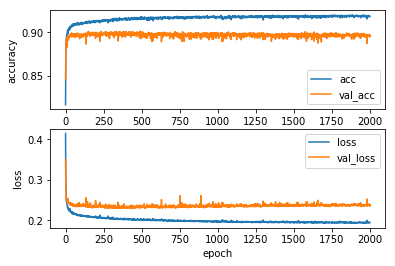

In [66]:
plot(history_TPS)

In [67]:
model.save('URZ_model_TPS.h5')

In [82]:
model_TPS.evaluate(test_X_TPS, test_Y_TPS)

6902/6902 [==============================] - 0s 8us/step


[0.23861501366115936, 0.895392639900905]

#### Test data confusion matrix

In [108]:
Y_pred = numpy.reshape(numpy.argmax(model_TPS.predict(test_X_TPS), axis=1), (test_X_TPS.shape[0],1))

# calculate confusion matrix
conf_mat = confusion_matrix(test_Y_TPS_, Y_pred)
print(conf_mat)

[[2161  171]
 [ 547 4023]]


In [109]:
(547+171)/(2161+4023)

0.11610608020698578

#### Just for curiosity -  Manual associations confusion matrix

In [104]:
Y_pred_man = numpy.argmax(model_TPS.predict(manual_X), axis=1)

# calculate confusion matrix
conf_mat = confusion_matrix(manual_Y_TPS_, Y_pred_man)
print(conf_mat)

[[1822  180]
 [ 983 3021]]


# Neural network T vs regP 

* we need a new dataset for this

### Dataset for T vs regP

In [87]:
#exclude regS
TP_train = TPS_train[TPS_train['CLASS_PHASE'] != 'regS']
TP_test  = TPS_test [TPS_test ['CLASS_PHASE'] != 'regS']

In [88]:
train_X_TP = TP_train[x_indices].values.astype(float)
train_Y_TP = TP_train[y_indices]

test_X_TP = TP_test[x_indices].values.astype(float)
test_Y_TP = TP_test[y_indices]

#regS = 0, T/regP = 1
train_Y_TP_ = numpy.array(numpy.where(train_Y_TP['CLASS_PHASE'] == 'regP', 0, 1), dtype=float)
test_Y_TP_ = numpy.array(numpy.where(test_Y_TP['CLASS_PHASE'] == 'regP', 0, 1), dtype=float)

#convert to categorical
train_Y_TP = keras.utils.to_categorical(train_Y_TP_)
test_Y_TP = keras.utils.to_categorical(test_Y_TP_)

print(train_X_TP.shape, train_Y_TP.shape, test_X_TP.shape, test_Y_TP.shape)

(13834, 15) (13834, 2) (4570, 15) (4570, 2)


### Neural network

In [94]:
history_TP = {k : [] for k in hist_keys}

In [95]:
n_input = len(x_indices)
numpy.random.seed(11)

# create model
model_TP = Sequential()
model_TP.add(Dense(n_input, input_dim=n_input, activation='sigmoid'))
model_TP.add(Dense(6, activation='sigmoid'))
model_TP.add(Dense(2, activation='sigmoid'))

model_TP.compile(
    loss = 'binary_crossentropy', 
    optimizer = 'adam',  # adam, sgd
    metrics = ['accuracy'])

In [96]:
h = model_TP.fit(train_X_TP[:], train_Y_TP[:], 
          epochs=2000, 
          batch_size=32, 
          verbose=1,
          shuffle=True,
          #validation_split=0.1)
          validation_data=([test_X_TP, test_Y_TP]))

history_TP = {k : history_TP[k] + h.history[k] for k in hist_keys}

Train on 13834 samples, validate on 4570 samples
Epoch 1/2000
13834/13834 [==============================] - 0s 22us/step - loss: 0.6833 - acc: 0.5641 - val_loss: 0.6627 - val_acc: 0.5985
Epoch 2/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.6475 - acc: 0.6080 - val_loss: 0.6276 - val_acc: 0.6094
Epoch 3/2000
13834/13834 [==============================] - 0s 26us/step - loss: 0.6154 - acc: 0.6514 - val_loss: 0.5984 - val_acc: 0.7055
Epoch 4/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.5866 - acc: 0.7056 - val_loss: 0.5669 - val_acc: 0.7373
Epoch 5/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.5563 - acc: 0.7323 - val_loss: 0.5350 - val_acc: 0.7503
Epoch 6/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.5274 - acc: 0.7521 - val_loss: 0.5133 - val_acc: 0.7624
Epoch 7/2000
13834/13834 [==============================] - 0s 22us/step - loss: 0.5131 - acc: 0.7544 - val_loss: 0.5

13834/13834 [==============================] - 0s 22us/step - loss: 0.4518 - acc: 0.7930 - val_loss: 0.4683 - val_acc: 0.7864
Epoch 60/2000
13834/13834 [==============================] - 0s 22us/step - loss: 0.4516 - acc: 0.7934 - val_loss: 0.4611 - val_acc: 0.7917
Epoch 61/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.4518 - acc: 0.7934 - val_loss: 0.4587 - val_acc: 0.7907
Epoch 62/2000
13834/13834 [==============================] - 0s 22us/step - loss: 0.4526 - acc: 0.7930 - val_loss: 0.4637 - val_acc: 0.7879
Epoch 63/2000
13834/13834 [==============================] - 0s 22us/step - loss: 0.4519 - acc: 0.7930 - val_loss: 0.4614 - val_acc: 0.7927
Epoch 64/2000
13834/13834 [==============================] - 0s 22us/step - loss: 0.4512 - acc: 0.7944 - val_loss: 0.4601 - val_acc: 0.7896
Epoch 65/2000
13834/13834 [==============================] - 0s 22us/step - loss: 0.4514 - acc: 0.7957 - val_loss: 0.4612 - val_acc: 0.7915
Epoch 66/2000
13834/13834 [=======

13834/13834 [==============================] - 0s 22us/step - loss: 0.4440 - acc: 0.7981 - val_loss: 0.4569 - val_acc: 0.7922
Epoch 118/2000
13834/13834 [==============================] - 0s 22us/step - loss: 0.4430 - acc: 0.8010 - val_loss: 0.4594 - val_acc: 0.7942
Epoch 119/2000
13834/13834 [==============================] - 0s 22us/step - loss: 0.4450 - acc: 0.7985 - val_loss: 0.4573 - val_acc: 0.7950
Epoch 120/2000
13834/13834 [==============================] - 0s 22us/step - loss: 0.4438 - acc: 0.8019 - val_loss: 0.4550 - val_acc: 0.7921
Epoch 121/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.4450 - acc: 0.8005 - val_loss: 0.4549 - val_acc: 0.7955
Epoch 122/2000
13834/13834 [==============================] - 0s 22us/step - loss: 0.4433 - acc: 0.8011 - val_loss: 0.4539 - val_acc: 0.7946
Epoch 123/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.4449 - acc: 0.7988 - val_loss: 0.4547 - val_acc: 0.7962
Epoch 124/2000
13834/13834 [

13834/13834 [==============================] - 0s 24us/step - loss: 0.4386 - acc: 0.8031 - val_loss: 0.4557 - val_acc: 0.7933
Epoch 176/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.4405 - acc: 0.8026 - val_loss: 0.4523 - val_acc: 0.7986
Epoch 177/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.4385 - acc: 0.8034 - val_loss: 0.4539 - val_acc: 0.7989
Epoch 178/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.4392 - acc: 0.8025 - val_loss: 0.4541 - val_acc: 0.7957
Epoch 179/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.4386 - acc: 0.8034 - val_loss: 0.4616 - val_acc: 0.7902
Epoch 180/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.4387 - acc: 0.8036 - val_loss: 0.4531 - val_acc: 0.7963
Epoch 181/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.4398 - acc: 0.8031 - val_loss: 0.4536 - val_acc: 0.7950
Epoch 182/2000
13834/13834 [

13834/13834 [==============================] - 0s 22us/step - loss: 0.4353 - acc: 0.8070 - val_loss: 0.4522 - val_acc: 0.7953
Epoch 234/2000
13834/13834 [==============================] - 0s 22us/step - loss: 0.4362 - acc: 0.8041 - val_loss: 0.4619 - val_acc: 0.7938
Epoch 235/2000
13834/13834 [==============================] - 0s 22us/step - loss: 0.4358 - acc: 0.8043 - val_loss: 0.4522 - val_acc: 0.7962
Epoch 236/2000
13834/13834 [==============================] - 0s 22us/step - loss: 0.4364 - acc: 0.8065 - val_loss: 0.4496 - val_acc: 0.8005
Epoch 237/2000
13834/13834 [==============================] - 0s 22us/step - loss: 0.4358 - acc: 0.8046 - val_loss: 0.4516 - val_acc: 0.7978
Epoch 238/2000
13834/13834 [==============================] - 0s 22us/step - loss: 0.4380 - acc: 0.8048 - val_loss: 0.4520 - val_acc: 0.7965
Epoch 239/2000
13834/13834 [==============================] - 0s 22us/step - loss: 0.4356 - acc: 0.8055 - val_loss: 0.4530 - val_acc: 0.7992
Epoch 240/2000
13834/13834 [

13834/13834 [==============================] - 0s 23us/step - loss: 0.4337 - acc: 0.8057 - val_loss: 0.4508 - val_acc: 0.7953
Epoch 292/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.4339 - acc: 0.8057 - val_loss: 0.4490 - val_acc: 0.7968
Epoch 293/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.4336 - acc: 0.8052 - val_loss: 0.4508 - val_acc: 0.7967
Epoch 294/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.4337 - acc: 0.8083 - val_loss: 0.4507 - val_acc: 0.7984
Epoch 295/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.4345 - acc: 0.8079 - val_loss: 0.4536 - val_acc: 0.7968
Epoch 296/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.4337 - acc: 0.8067 - val_loss: 0.4500 - val_acc: 0.8005
Epoch 297/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.4342 - acc: 0.8062 - val_loss: 0.4545 - val_acc: 0.7993
Epoch 298/2000
13834/13834 [

13834/13834 [==============================] - 0s 23us/step - loss: 0.4317 - acc: 0.8083 - val_loss: 0.4560 - val_acc: 0.7940
Epoch 350/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.4316 - acc: 0.8090 - val_loss: 0.4477 - val_acc: 0.8000
Epoch 351/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.4314 - acc: 0.8081 - val_loss: 0.4463 - val_acc: 0.7992
Epoch 352/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.4308 - acc: 0.8091 - val_loss: 0.4531 - val_acc: 0.7941
Epoch 353/2000
13834/13834 [==============================] - 0s 22us/step - loss: 0.4314 - acc: 0.8093 - val_loss: 0.4544 - val_acc: 0.7934
Epoch 354/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.4316 - acc: 0.8053 - val_loss: 0.4514 - val_acc: 0.7980
Epoch 355/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.4296 - acc: 0.8073 - val_loss: 0.4493 - val_acc: 0.7987
Epoch 356/2000
13834/13834 [

13834/13834 [==============================] - 0s 24us/step - loss: 0.4299 - acc: 0.8097 - val_loss: 0.4465 - val_acc: 0.7990
Epoch 408/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.4297 - acc: 0.8086 - val_loss: 0.4448 - val_acc: 0.8021
Epoch 409/2000
13834/13834 [==============================] - 0s 22us/step - loss: 0.4293 - acc: 0.8110 - val_loss: 0.4461 - val_acc: 0.8012
Epoch 410/2000
13834/13834 [==============================] - 0s 22us/step - loss: 0.4292 - acc: 0.8086 - val_loss: 0.4491 - val_acc: 0.8001
Epoch 411/2000
13834/13834 [==============================] - 0s 22us/step - loss: 0.4292 - acc: 0.8076 - val_loss: 0.4463 - val_acc: 0.8012
Epoch 412/2000
13834/13834 [==============================] - 0s 24us/step - loss: 0.4302 - acc: 0.8095 - val_loss: 0.4498 - val_acc: 0.8010
Epoch 413/2000
13834/13834 [==============================] - 0s 24us/step - loss: 0.4307 - acc: 0.8070 - val_loss: 0.4507 - val_acc: 0.7964
Epoch 414/2000
13834/13834 [

13834/13834 [==============================] - 0s 23us/step - loss: 0.4288 - acc: 0.8098 - val_loss: 0.4453 - val_acc: 0.8007
Epoch 466/2000
13834/13834 [==============================] - 0s 24us/step - loss: 0.4280 - acc: 0.8094 - val_loss: 0.4457 - val_acc: 0.8027
Epoch 467/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.4276 - acc: 0.8112 - val_loss: 0.4457 - val_acc: 0.8031
Epoch 468/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.4280 - acc: 0.8092 - val_loss: 0.4482 - val_acc: 0.8013
Epoch 469/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.4283 - acc: 0.8072 - val_loss: 0.4460 - val_acc: 0.7992
Epoch 470/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.4281 - acc: 0.8106 - val_loss: 0.4454 - val_acc: 0.7999
Epoch 471/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.4273 - acc: 0.8103 - val_loss: 0.4462 - val_acc: 0.8007
Epoch 472/2000
13834/13834 [

13834/13834 [==============================] - 0s 23us/step - loss: 0.4263 - acc: 0.8111 - val_loss: 0.4445 - val_acc: 0.8035
Epoch 524/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.4268 - acc: 0.8085 - val_loss: 0.4475 - val_acc: 0.8025
Epoch 525/2000
13834/13834 [==============================] - 0s 24us/step - loss: 0.4273 - acc: 0.8088 - val_loss: 0.4480 - val_acc: 0.8007
Epoch 526/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.4283 - acc: 0.8086 - val_loss: 0.4452 - val_acc: 0.8033
Epoch 527/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.4273 - acc: 0.8095 - val_loss: 0.4474 - val_acc: 0.8011
Epoch 528/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.4262 - acc: 0.8086 - val_loss: 0.4527 - val_acc: 0.8000
Epoch 529/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.4269 - acc: 0.8108 - val_loss: 0.4447 - val_acc: 0.8043
Epoch 530/2000
13834/13834 [

13834/13834 [==============================] - 0s 24us/step - loss: 0.4262 - acc: 0.8090 - val_loss: 0.4448 - val_acc: 0.8028
Epoch 582/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.4259 - acc: 0.8100 - val_loss: 0.4446 - val_acc: 0.7995
Epoch 583/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.4262 - acc: 0.8104 - val_loss: 0.4449 - val_acc: 0.8030
Epoch 584/2000
13834/13834 [==============================] - 0s 22us/step - loss: 0.4266 - acc: 0.8119 - val_loss: 0.4513 - val_acc: 0.7972
Epoch 585/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.4245 - acc: 0.8122 - val_loss: 0.4489 - val_acc: 0.7982
Epoch 586/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.4258 - acc: 0.8119 - val_loss: 0.4595 - val_acc: 0.7903
Epoch 587/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.4267 - acc: 0.8110 - val_loss: 0.4450 - val_acc: 0.8010
Epoch 588/2000
13834/13834 [

13834/13834 [==============================] - 0s 23us/step - loss: 0.4244 - acc: 0.8123 - val_loss: 0.4450 - val_acc: 0.8008
Epoch 640/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.4239 - acc: 0.8119 - val_loss: 0.4463 - val_acc: 0.7992
Epoch 641/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.4252 - acc: 0.8098 - val_loss: 0.4513 - val_acc: 0.7969
Epoch 642/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.4244 - acc: 0.8107 - val_loss: 0.4462 - val_acc: 0.8016
Epoch 643/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.4249 - acc: 0.8112 - val_loss: 0.4443 - val_acc: 0.8004
Epoch 644/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.4259 - acc: 0.8106 - val_loss: 0.4454 - val_acc: 0.8031
Epoch 645/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.4249 - acc: 0.8102 - val_loss: 0.4456 - val_acc: 0.7995
Epoch 646/2000
13834/13834 [

13834/13834 [==============================] - 0s 23us/step - loss: 0.4247 - acc: 0.8098 - val_loss: 0.4473 - val_acc: 0.7992
Epoch 698/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.4248 - acc: 0.8105 - val_loss: 0.4459 - val_acc: 0.8035
Epoch 699/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.4243 - acc: 0.8119 - val_loss: 0.4454 - val_acc: 0.8018
Epoch 700/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.4236 - acc: 0.8114 - val_loss: 0.4458 - val_acc: 0.7978
Epoch 701/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.4246 - acc: 0.8131 - val_loss: 0.4474 - val_acc: 0.7998
Epoch 702/2000
13834/13834 [==============================] - 0s 24us/step - loss: 0.4248 - acc: 0.8122 - val_loss: 0.4468 - val_acc: 0.8002
Epoch 703/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.4244 - acc: 0.8107 - val_loss: 0.4460 - val_acc: 0.8004
Epoch 704/2000
13834/13834 [

13834/13834 [==============================] - 0s 23us/step - loss: 0.4240 - acc: 0.8111 - val_loss: 0.4459 - val_acc: 0.8005
Epoch 756/2000
13834/13834 [==============================] - 0s 24us/step - loss: 0.4237 - acc: 0.8121 - val_loss: 0.4449 - val_acc: 0.8004
Epoch 757/2000
13834/13834 [==============================] - 0s 24us/step - loss: 0.4236 - acc: 0.8130 - val_loss: 0.4456 - val_acc: 0.8005
Epoch 758/2000
13834/13834 [==============================] - 0s 24us/step - loss: 0.4246 - acc: 0.8103 - val_loss: 0.4464 - val_acc: 0.8012
Epoch 759/2000
13834/13834 [==============================] - 0s 24us/step - loss: 0.4240 - acc: 0.8103 - val_loss: 0.4489 - val_acc: 0.7980
Epoch 760/2000
13834/13834 [==============================] - 0s 24us/step - loss: 0.4260 - acc: 0.8105 - val_loss: 0.4450 - val_acc: 0.8012
Epoch 761/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.4236 - acc: 0.8131 - val_loss: 0.4476 - val_acc: 0.8000
Epoch 762/2000
13834/13834 [

13834/13834 [==============================] - 0s 24us/step - loss: 0.4244 - acc: 0.8110 - val_loss: 0.4478 - val_acc: 0.8023
Epoch 814/2000
13834/13834 [==============================] - 0s 24us/step - loss: 0.4233 - acc: 0.8138 - val_loss: 0.4455 - val_acc: 0.8005
Epoch 815/2000
13834/13834 [==============================] - 0s 24us/step - loss: 0.4235 - acc: 0.8134 - val_loss: 0.4455 - val_acc: 0.8008
Epoch 816/2000
13834/13834 [==============================] - 0s 25us/step - loss: 0.4232 - acc: 0.8121 - val_loss: 0.4512 - val_acc: 0.7978
Epoch 817/2000
13834/13834 [==============================] - 0s 25us/step - loss: 0.4245 - acc: 0.8118 - val_loss: 0.4439 - val_acc: 0.8026
Epoch 818/2000
13834/13834 [==============================] - 0s 25us/step - loss: 0.4229 - acc: 0.8108 - val_loss: 0.4464 - val_acc: 0.8023
Epoch 819/2000
13834/13834 [==============================] - 0s 24us/step - loss: 0.4238 - acc: 0.8123 - val_loss: 0.4526 - val_acc: 0.7964
Epoch 820/2000
13834/13834 [

13834/13834 [==============================] - 0s 26us/step - loss: 0.4238 - acc: 0.8109 - val_loss: 0.4472 - val_acc: 0.8019
Epoch 872/2000
13834/13834 [==============================] - 0s 24us/step - loss: 0.4237 - acc: 0.8113 - val_loss: 0.4470 - val_acc: 0.8007
Epoch 873/2000
13834/13834 [==============================] - 0s 24us/step - loss: 0.4230 - acc: 0.8127 - val_loss: 0.4448 - val_acc: 0.8021
Epoch 874/2000
13834/13834 [==============================] - 0s 24us/step - loss: 0.4227 - acc: 0.8110 - val_loss: 0.4448 - val_acc: 0.8043
Epoch 875/2000
13834/13834 [==============================] - 0s 24us/step - loss: 0.4239 - acc: 0.8121 - val_loss: 0.4465 - val_acc: 0.8012
Epoch 876/2000
13834/13834 [==============================] - 0s 24us/step - loss: 0.4242 - acc: 0.8129 - val_loss: 0.4459 - val_acc: 0.8007
Epoch 877/2000
13834/13834 [==============================] - 0s 24us/step - loss: 0.4241 - acc: 0.8100 - val_loss: 0.4436 - val_acc: 0.8008
Epoch 878/2000
13834/13834 [

13834/13834 [==============================] - 0s 24us/step - loss: 0.4230 - acc: 0.8111 - val_loss: 0.4472 - val_acc: 0.8023
Epoch 930/2000
13834/13834 [==============================] - 0s 24us/step - loss: 0.4228 - acc: 0.8115 - val_loss: 0.4483 - val_acc: 0.8005
Epoch 931/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.4225 - acc: 0.8121 - val_loss: 0.4448 - val_acc: 0.8001
Epoch 932/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.4231 - acc: 0.8130 - val_loss: 0.4470 - val_acc: 0.8022
Epoch 933/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.4232 - acc: 0.8132 - val_loss: 0.4490 - val_acc: 0.8002
Epoch 934/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.4232 - acc: 0.8134 - val_loss: 0.4433 - val_acc: 0.8007
Epoch 935/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.4234 - acc: 0.8110 - val_loss: 0.4461 - val_acc: 0.8009
Epoch 936/2000
13834/13834 [

13834/13834 [==============================] - 0s 24us/step - loss: 0.4233 - acc: 0.8120 - val_loss: 0.4452 - val_acc: 0.8037
Epoch 988/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.4227 - acc: 0.8126 - val_loss: 0.4461 - val_acc: 0.8016
Epoch 989/2000
13834/13834 [==============================] - 0s 26us/step - loss: 0.4234 - acc: 0.8118 - val_loss: 0.4450 - val_acc: 0.8035
Epoch 990/2000
13834/13834 [==============================] - 0s 26us/step - loss: 0.4237 - acc: 0.8122 - val_loss: 0.4440 - val_acc: 0.8018
Epoch 991/2000
13834/13834 [==============================] - 0s 25us/step - loss: 0.4217 - acc: 0.8139 - val_loss: 0.4448 - val_acc: 0.8002
Epoch 992/2000
13834/13834 [==============================] - 0s 25us/step - loss: 0.4232 - acc: 0.8133 - val_loss: 0.4495 - val_acc: 0.8003
Epoch 993/2000
13834/13834 [==============================] - 0s 25us/step - loss: 0.4231 - acc: 0.8125 - val_loss: 0.4508 - val_acc: 0.7991
Epoch 994/2000
13834/13834 [

Epoch 1045/2000
13834/13834 [==============================] - 0s 25us/step - loss: 0.4239 - acc: 0.8112 - val_loss: 0.4436 - val_acc: 0.8022
Epoch 1046/2000
13834/13834 [==============================] - 0s 25us/step - loss: 0.4234 - acc: 0.8092 - val_loss: 0.4515 - val_acc: 0.8007
Epoch 1047/2000
13834/13834 [==============================] - 0s 25us/step - loss: 0.4225 - acc: 0.8123 - val_loss: 0.4449 - val_acc: 0.7998
Epoch 1048/2000
13834/13834 [==============================] - 0s 25us/step - loss: 0.4228 - acc: 0.8118 - val_loss: 0.4438 - val_acc: 0.7986
Epoch 1049/2000
13834/13834 [==============================] - 0s 26us/step - loss: 0.4228 - acc: 0.8115 - val_loss: 0.4453 - val_acc: 0.7999
Epoch 1050/2000
13834/13834 [==============================] - 0s 25us/step - loss: 0.4217 - acc: 0.8117 - val_loss: 0.4455 - val_acc: 0.8007
Epoch 1051/2000
13834/13834 [==============================] - 0s 25us/step - loss: 0.4221 - acc: 0.8120 - val_loss: 0.4433 - val_acc: 0.8013
Epoch 

13834/13834 [==============================] - 0s 25us/step - loss: 0.4228 - acc: 0.8140 - val_loss: 0.4529 - val_acc: 0.7967
Epoch 1103/2000
13834/13834 [==============================] - 0s 26us/step - loss: 0.4218 - acc: 0.8128 - val_loss: 0.4451 - val_acc: 0.8011
Epoch 1104/2000
13834/13834 [==============================] - 0s 25us/step - loss: 0.4218 - acc: 0.8131 - val_loss: 0.4460 - val_acc: 0.7991
Epoch 1105/2000
13834/13834 [==============================] - 0s 25us/step - loss: 0.4218 - acc: 0.8130 - val_loss: 0.4449 - val_acc: 0.8024
Epoch 1106/2000
13834/13834 [==============================] - 0s 25us/step - loss: 0.4216 - acc: 0.8125 - val_loss: 0.4452 - val_acc: 0.8003
Epoch 1107/2000
13834/13834 [==============================] - 0s 25us/step - loss: 0.4226 - acc: 0.8113 - val_loss: 0.4455 - val_acc: 0.8004
Epoch 1108/2000
13834/13834 [==============================] - 0s 25us/step - loss: 0.4222 - acc: 0.8118 - val_loss: 0.4451 - val_acc: 0.8033
Epoch 1109/2000
13834/

Epoch 1160/2000
13834/13834 [==============================] - 0s 25us/step - loss: 0.4212 - acc: 0.8132 - val_loss: 0.4466 - val_acc: 0.8007
Epoch 1161/2000
13834/13834 [==============================] - 0s 24us/step - loss: 0.4218 - acc: 0.8113 - val_loss: 0.4449 - val_acc: 0.8007
Epoch 1162/2000
13834/13834 [==============================] - 0s 24us/step - loss: 0.4234 - acc: 0.8122 - val_loss: 0.4431 - val_acc: 0.8015
Epoch 1163/2000
13834/13834 [==============================] - 0s 25us/step - loss: 0.4222 - acc: 0.8121 - val_loss: 0.4483 - val_acc: 0.7985
Epoch 1164/2000
13834/13834 [==============================] - 0s 24us/step - loss: 0.4228 - acc: 0.8120 - val_loss: 0.4453 - val_acc: 0.8013
Epoch 1165/2000
13834/13834 [==============================] - 0s 24us/step - loss: 0.4215 - acc: 0.8114 - val_loss: 0.4443 - val_acc: 0.8015
Epoch 1166/2000
13834/13834 [==============================] - 0s 24us/step - loss: 0.4214 - acc: 0.8132 - val_loss: 0.4490 - val_acc: 0.7993
Epoch 

13834/13834 [==============================] - 0s 25us/step - loss: 0.4217 - acc: 0.8138 - val_loss: 0.4447 - val_acc: 0.8002
Epoch 1218/2000
13834/13834 [==============================] - 0s 24us/step - loss: 0.4219 - acc: 0.8116 - val_loss: 0.4449 - val_acc: 0.7998
Epoch 1219/2000
13834/13834 [==============================] - 0s 24us/step - loss: 0.4218 - acc: 0.8128 - val_loss: 0.4433 - val_acc: 0.8020
Epoch 1220/2000
13834/13834 [==============================] - 0s 24us/step - loss: 0.4217 - acc: 0.8126 - val_loss: 0.4458 - val_acc: 0.7989
Epoch 1221/2000
13834/13834 [==============================] - 0s 24us/step - loss: 0.4214 - acc: 0.8126 - val_loss: 0.4461 - val_acc: 0.7952
Epoch 1222/2000
13834/13834 [==============================] - 0s 24us/step - loss: 0.4226 - acc: 0.8114 - val_loss: 0.4437 - val_acc: 0.8002
Epoch 1223/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.4217 - acc: 0.8123 - val_loss: 0.4443 - val_acc: 0.7991
Epoch 1224/2000
13834/

Epoch 1275/2000
13834/13834 [==============================] - 0s 25us/step - loss: 0.4224 - acc: 0.8116 - val_loss: 0.4436 - val_acc: 0.7993
Epoch 1276/2000
13834/13834 [==============================] - 0s 24us/step - loss: 0.4227 - acc: 0.8113 - val_loss: 0.4421 - val_acc: 0.8013
Epoch 1277/2000
13834/13834 [==============================] - 0s 24us/step - loss: 0.4220 - acc: 0.8136 - val_loss: 0.4444 - val_acc: 0.7978
Epoch 1278/2000
13834/13834 [==============================] - 0s 24us/step - loss: 0.4216 - acc: 0.8134 - val_loss: 0.4439 - val_acc: 0.8026
Epoch 1279/2000
13834/13834 [==============================] - 0s 24us/step - loss: 0.4219 - acc: 0.8123 - val_loss: 0.4441 - val_acc: 0.7996
Epoch 1280/2000
13834/13834 [==============================] - 0s 24us/step - loss: 0.4219 - acc: 0.8129 - val_loss: 0.4443 - val_acc: 0.8000
Epoch 1281/2000
13834/13834 [==============================] - 0s 24us/step - loss: 0.4226 - acc: 0.8119 - val_loss: 0.4438 - val_acc: 0.8002
Epoch 

13834/13834 [==============================] - 0s 24us/step - loss: 0.4223 - acc: 0.8141 - val_loss: 0.4432 - val_acc: 0.8024
Epoch 1333/2000
13834/13834 [==============================] - 0s 24us/step - loss: 0.4219 - acc: 0.8136 - val_loss: 0.4435 - val_acc: 0.8013
Epoch 1334/2000
13834/13834 [==============================] - 0s 24us/step - loss: 0.4217 - acc: 0.8138 - val_loss: 0.4419 - val_acc: 0.7985
Epoch 1335/2000
13834/13834 [==============================] - 0s 24us/step - loss: 0.4218 - acc: 0.8136 - val_loss: 0.4453 - val_acc: 0.8033
Epoch 1336/2000
13834/13834 [==============================] - 0s 24us/step - loss: 0.4227 - acc: 0.8112 - val_loss: 0.4442 - val_acc: 0.8024
Epoch 1337/2000
13834/13834 [==============================] - 0s 24us/step - loss: 0.4215 - acc: 0.8140 - val_loss: 0.4455 - val_acc: 0.8023
Epoch 1338/2000
13834/13834 [==============================] - 0s 25us/step - loss: 0.4219 - acc: 0.8116 - val_loss: 0.4449 - val_acc: 0.8009
Epoch 1339/2000
13834/

Epoch 1390/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.4214 - acc: 0.8139 - val_loss: 0.4453 - val_acc: 0.8018
Epoch 1391/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.4211 - acc: 0.8128 - val_loss: 0.4466 - val_acc: 0.8011
Epoch 1392/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.4213 - acc: 0.8136 - val_loss: 0.4442 - val_acc: 0.8000
Epoch 1393/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.4211 - acc: 0.8140 - val_loss: 0.4435 - val_acc: 0.8007
Epoch 1394/2000
13834/13834 [==============================] - 0s 24us/step - loss: 0.4215 - acc: 0.8132 - val_loss: 0.4495 - val_acc: 0.7963
Epoch 1395/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.4218 - acc: 0.8134 - val_loss: 0.4430 - val_acc: 0.8057
Epoch 1396/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.4222 - acc: 0.8127 - val_loss: 0.4433 - val_acc: 0.8037
Epoch 

13834/13834 [==============================] - 0s 23us/step - loss: 0.4214 - acc: 0.8141 - val_loss: 0.4430 - val_acc: 0.8028
Epoch 1448/2000
13834/13834 [==============================] - 0s 24us/step - loss: 0.4218 - acc: 0.8135 - val_loss: 0.4433 - val_acc: 0.8007
Epoch 1449/2000
13834/13834 [==============================] - 0s 24us/step - loss: 0.4206 - acc: 0.8113 - val_loss: 0.4433 - val_acc: 0.8018
Epoch 1450/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.4215 - acc: 0.8122 - val_loss: 0.4444 - val_acc: 0.8020
Epoch 1451/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.4209 - acc: 0.8145 - val_loss: 0.4436 - val_acc: 0.8011
Epoch 1452/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.4214 - acc: 0.8126 - val_loss: 0.4438 - val_acc: 0.8007
Epoch 1453/2000
13834/13834 [==============================] - 0s 23us/step - loss: 0.4223 - acc: 0.8143 - val_loss: 0.4433 - val_acc: 0.8031
Epoch 1454/2000
13834/

Epoch 1505/2000
13834/13834 [==============================] - 0s 24us/step - loss: 0.4208 - acc: 0.8123 - val_loss: 0.4500 - val_acc: 0.7952
Epoch 1506/2000
13834/13834 [==============================] - 0s 25us/step - loss: 0.4211 - acc: 0.8134 - val_loss: 0.4418 - val_acc: 0.8033
Epoch 1507/2000
13834/13834 [==============================] - 0s 25us/step - loss: 0.4214 - acc: 0.8158 - val_loss: 0.4438 - val_acc: 0.8015
Epoch 1508/2000
13834/13834 [==============================] - 0s 24us/step - loss: 0.4212 - acc: 0.8130 - val_loss: 0.4457 - val_acc: 0.8020
Epoch 1509/2000
13834/13834 [==============================] - 0s 24us/step - loss: 0.4202 - acc: 0.8131 - val_loss: 0.4443 - val_acc: 0.8013
Epoch 1510/2000
13834/13834 [==============================] - 0s 24us/step - loss: 0.4210 - acc: 0.8130 - val_loss: 0.4433 - val_acc: 0.8018
Epoch 1511/2000
13834/13834 [==============================] - 0s 24us/step - loss: 0.4213 - acc: 0.8132 - val_loss: 0.4448 - val_acc: 0.8023
Epoch 

13834/13834 [==============================] - 0s 24us/step - loss: 0.4200 - acc: 0.8138 - val_loss: 0.4440 - val_acc: 0.8046
Epoch 1563/2000
13834/13834 [==============================] - 0s 24us/step - loss: 0.4208 - acc: 0.8128 - val_loss: 0.4438 - val_acc: 0.8007
Epoch 1564/2000
13834/13834 [==============================] - 0s 24us/step - loss: 0.4202 - acc: 0.8124 - val_loss: 0.4425 - val_acc: 0.8024
Epoch 1565/2000
13834/13834 [==============================] - 0s 24us/step - loss: 0.4207 - acc: 0.8136 - val_loss: 0.4444 - val_acc: 0.7998
Epoch 1566/2000
13834/13834 [==============================] - 0s 24us/step - loss: 0.4206 - acc: 0.8136 - val_loss: 0.4449 - val_acc: 0.7996
Epoch 1567/2000
13834/13834 [==============================] - 0s 24us/step - loss: 0.4208 - acc: 0.8141 - val_loss: 0.4424 - val_acc: 0.8026
Epoch 1568/2000
13834/13834 [==============================] - 0s 24us/step - loss: 0.4206 - acc: 0.8134 - val_loss: 0.4450 - val_acc: 0.8024
Epoch 1569/2000
13834/

Epoch 1620/2000
13834/13834 [==============================] - 0s 25us/step - loss: 0.4197 - acc: 0.8134 - val_loss: 0.4474 - val_acc: 0.8002
Epoch 1621/2000
13834/13834 [==============================] - 0s 25us/step - loss: 0.4211 - acc: 0.8131 - val_loss: 0.4467 - val_acc: 0.8015
Epoch 1622/2000
13834/13834 [==============================] - 0s 25us/step - loss: 0.4211 - acc: 0.8136 - val_loss: 0.4451 - val_acc: 0.8022
Epoch 1623/2000
13834/13834 [==============================] - 0s 25us/step - loss: 0.4203 - acc: 0.8139 - val_loss: 0.4450 - val_acc: 0.7982
Epoch 1624/2000
13834/13834 [==============================] - 0s 25us/step - loss: 0.4206 - acc: 0.8142 - val_loss: 0.4438 - val_acc: 0.8009
Epoch 1625/2000
13834/13834 [==============================] - 0s 25us/step - loss: 0.4196 - acc: 0.8126 - val_loss: 0.4467 - val_acc: 0.8000
Epoch 1626/2000
13834/13834 [==============================] - 0s 25us/step - loss: 0.4206 - acc: 0.8126 - val_loss: 0.4453 - val_acc: 0.8002
Epoch 

13834/13834 [==============================] - 0s 25us/step - loss: 0.4201 - acc: 0.8139 - val_loss: 0.4464 - val_acc: 0.8007
Epoch 1678/2000
13834/13834 [==============================] - 0s 24us/step - loss: 0.4195 - acc: 0.8151 - val_loss: 0.4445 - val_acc: 0.8020
Epoch 1679/2000
13834/13834 [==============================] - 0s 25us/step - loss: 0.4197 - acc: 0.8140 - val_loss: 0.4436 - val_acc: 0.8020
Epoch 1680/2000
13834/13834 [==============================] - 0s 24us/step - loss: 0.4190 - acc: 0.8131 - val_loss: 0.4426 - val_acc: 0.8022
Epoch 1681/2000
13834/13834 [==============================] - 0s 24us/step - loss: 0.4198 - acc: 0.8142 - val_loss: 0.4428 - val_acc: 0.8022
Epoch 1682/2000
13834/13834 [==============================] - 0s 24us/step - loss: 0.4193 - acc: 0.8152 - val_loss: 0.4454 - val_acc: 0.8002
Epoch 1683/2000
13834/13834 [==============================] - 0s 25us/step - loss: 0.4200 - acc: 0.8146 - val_loss: 0.4461 - val_acc: 0.8024
Epoch 1684/2000
13834/

Epoch 1735/2000
13834/13834 [==============================] - 0s 26us/step - loss: 0.4196 - acc: 0.8149 - val_loss: 0.4446 - val_acc: 0.8039
Epoch 1736/2000
13834/13834 [==============================] - 0s 26us/step - loss: 0.4202 - acc: 0.8136 - val_loss: 0.4455 - val_acc: 0.8028
Epoch 1737/2000
13834/13834 [==============================] - 0s 26us/step - loss: 0.4197 - acc: 0.8149 - val_loss: 0.4452 - val_acc: 0.8018
Epoch 1738/2000
13834/13834 [==============================] - 0s 26us/step - loss: 0.4199 - acc: 0.8147 - val_loss: 0.4464 - val_acc: 0.7974
Epoch 1739/2000
13834/13834 [==============================] - 0s 26us/step - loss: 0.4203 - acc: 0.8136 - val_loss: 0.4459 - val_acc: 0.8007
Epoch 1740/2000
13834/13834 [==============================] - 0s 26us/step - loss: 0.4202 - acc: 0.8135 - val_loss: 0.4505 - val_acc: 0.7987
Epoch 1741/2000
13834/13834 [==============================] - 0s 25us/step - loss: 0.4191 - acc: 0.8133 - val_loss: 0.4453 - val_acc: 0.8028
Epoch 

13834/13834 [==============================] - 0s 27us/step - loss: 0.4202 - acc: 0.8144 - val_loss: 0.4446 - val_acc: 0.8024
Epoch 1793/2000
13834/13834 [==============================] - 0s 27us/step - loss: 0.4193 - acc: 0.8166 - val_loss: 0.4475 - val_acc: 0.8015
Epoch 1794/2000
13834/13834 [==============================] - 0s 26us/step - loss: 0.4198 - acc: 0.8135 - val_loss: 0.4467 - val_acc: 0.7991
Epoch 1795/2000
13834/13834 [==============================] - 0s 27us/step - loss: 0.4206 - acc: 0.8129 - val_loss: 0.4450 - val_acc: 0.8018
Epoch 1796/2000
13834/13834 [==============================] - 0s 28us/step - loss: 0.4189 - acc: 0.8142 - val_loss: 0.4453 - val_acc: 0.8028
Epoch 1797/2000
13834/13834 [==============================] - 0s 27us/step - loss: 0.4192 - acc: 0.8150 - val_loss: 0.4434 - val_acc: 0.8035
Epoch 1798/2000
13834/13834 [==============================] - 0s 27us/step - loss: 0.4194 - acc: 0.8163 - val_loss: 0.4484 - val_acc: 0.7998
Epoch 1799/2000
13834/

Epoch 1850/2000
13834/13834 [==============================] - 0s 27us/step - loss: 0.4201 - acc: 0.8151 - val_loss: 0.4465 - val_acc: 0.8020
Epoch 1851/2000
13834/13834 [==============================] - 0s 28us/step - loss: 0.4191 - acc: 0.8130 - val_loss: 0.4524 - val_acc: 0.8020
Epoch 1852/2000
13834/13834 [==============================] - 0s 28us/step - loss: 0.4190 - acc: 0.8138 - val_loss: 0.4530 - val_acc: 0.7996
Epoch 1853/2000
13834/13834 [==============================] - 0s 28us/step - loss: 0.4200 - acc: 0.8145 - val_loss: 0.4445 - val_acc: 0.8020
Epoch 1854/2000
13834/13834 [==============================] - 0s 27us/step - loss: 0.4193 - acc: 0.8141 - val_loss: 0.4442 - val_acc: 0.8022
Epoch 1855/2000
13834/13834 [==============================] - 0s 27us/step - loss: 0.4195 - acc: 0.8154 - val_loss: 0.4461 - val_acc: 0.8018
Epoch 1856/2000
13834/13834 [==============================] - 0s 27us/step - loss: 0.4211 - acc: 0.8116 - val_loss: 0.4454 - val_acc: 0.8026
Epoch 

13834/13834 [==============================] - 0s 26us/step - loss: 0.4190 - acc: 0.8146 - val_loss: 0.4469 - val_acc: 0.8037
Epoch 1908/2000
13834/13834 [==============================] - 0s 25us/step - loss: 0.4197 - acc: 0.8157 - val_loss: 0.4470 - val_acc: 0.8009
Epoch 1909/2000
13834/13834 [==============================] - 0s 25us/step - loss: 0.4196 - acc: 0.8144 - val_loss: 0.4485 - val_acc: 0.8037
Epoch 1910/2000
13834/13834 [==============================] - 0s 25us/step - loss: 0.4209 - acc: 0.8129 - val_loss: 0.4455 - val_acc: 0.8004
Epoch 1911/2000
13834/13834 [==============================] - 0s 26us/step - loss: 0.4201 - acc: 0.8132 - val_loss: 0.4465 - val_acc: 0.8015
Epoch 1912/2000
13834/13834 [==============================] - 0s 25us/step - loss: 0.4200 - acc: 0.8137 - val_loss: 0.4473 - val_acc: 0.8046
Epoch 1913/2000
13834/13834 [==============================] - 0s 25us/step - loss: 0.4203 - acc: 0.8144 - val_loss: 0.4492 - val_acc: 0.8028
Epoch 1914/2000
13834/

Epoch 1965/2000
13834/13834 [==============================] - 0s 25us/step - loss: 0.4190 - acc: 0.8154 - val_loss: 0.4482 - val_acc: 0.8002
Epoch 1966/2000
13834/13834 [==============================] - 0s 25us/step - loss: 0.4192 - acc: 0.8143 - val_loss: 0.4493 - val_acc: 0.8015
Epoch 1967/2000
13834/13834 [==============================] - 0s 25us/step - loss: 0.4192 - acc: 0.8156 - val_loss: 0.4471 - val_acc: 0.8022
Epoch 1968/2000
13834/13834 [==============================] - 0s 26us/step - loss: 0.4187 - acc: 0.8147 - val_loss: 0.4495 - val_acc: 0.7978
Epoch 1969/2000
13834/13834 [==============================] - 0s 25us/step - loss: 0.4189 - acc: 0.8152 - val_loss: 0.4477 - val_acc: 0.8022
Epoch 1970/2000
13834/13834 [==============================] - 0s 26us/step - loss: 0.4187 - acc: 0.8130 - val_loss: 0.4478 - val_acc: 0.8000
Epoch 1971/2000
13834/13834 [==============================] - 0s 25us/step - loss: 0.4187 - acc: 0.8155 - val_loss: 0.4483 - val_acc: 0.7993
Epoch 

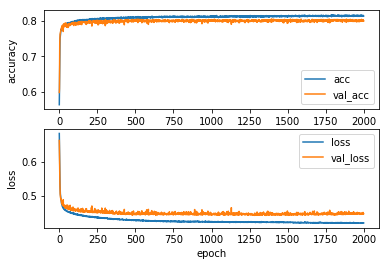

In [97]:
plot(history_TP)

In [98]:
model.save('URZ_model_TP.h5')

In [100]:
model_TP.evaluate(test_X_TP, test_Y_TP)

4570/4570 [==============================] - 0s 8us/step


[0.4463778110119133, 0.8004376368136583]

#### Test data confusion matrix

In [103]:
Y_pred = numpy.reshape(numpy.argmax(model_TP.predict(test_X_TP), axis=1), (test_X_TP.shape[0],1))

# calculate confusion matrix
conf_mat = confusion_matrix(test_Y_TP_, Y_pred)
print(conf_mat)

[[1796  446]
 [ 466 1862]]


# Cascade of all three models

In [110]:
from keras.models import load_model

In [111]:
model_NTPS = load_model('URZ_model_NTPS.h5')
model_STP = load_model('URZ_model_TPS.h5')
model_PT = load_model('URZ_model_TP.h5')

In [224]:
def predict_iwt(X, stage=0):
    """
    predicts initial wave type for given featrue vectors
    Class encoding generated by sklearn Label Encoder
    0 - noise
    2 - regS 
    1 - regP
    3 - T
    """
    Y = numpy.arange(X.shape[0])
    
    N_indices = None
    S_indices = None 
    
    if stage >= 1:
        N_indices = [False] * X.shape[0]
        X_PTS = X
        Y_NPTS = numpy.ones(X.shape[0])
    if stage >= 2:
        S_indices =  [False] * X.shape[0]  # numpy.array([])
        X_PT = X
        Y_PTS = numpy.ones(X.shape[0])
        
    
    """
    N vs regS, regP, T
    """
    if N_indices is None:
        #predict N vs T,regP,regS
        Y_NPTS = numpy.argmax(model_NTPS.predict(X), axis=1)
        #set which are noise
        N_indices = Y[Y_NPTS == 0]  #  = 0
        #get candidates for TPS
        X_PTS = X[Y_NPTS > 0]
    else:
        print('Skipping N, classifying TPS only')

    """
    regS vs regP, T
    """
    if S_indices is None:    
        #predict regS vs T,regP
        Y_PTS = numpy.argmax(model_TPS.predict(X_PTS), axis=1)
        #set which are regS
        S_indices = Y[Y_NPTS > 0][Y_PTS == 0]  # = 2
        #get candidates for regP,T
        X_PT = X_PTS[Y_PTS > 0]
    else:
        print('Skipping N, regS, classifying TP only')

    """
    regP vs T
    """
    #predict regP vs T
    Y_PT = numpy.argmax(model_TP.predict(X_PT), axis=1)
    #set which are regP
    P_indices = Y[Y_NPTS > 0][Y_PTS > 0][Y_PT == 0]  # = 1    
    #set which are T
    T_indices = Y[Y_NPTS > 0][Y_PTS > 0][Y_PT > 0]   # = 3
    #get those which are T
    X_T = X_PT[Y_PT > 0]
    
    Y[N_indices] = 0 # N
    Y[S_indices] = 2 # regS
    Y[P_indices] = 1 # regP 
    Y[T_indices] = 3 # tele
    
    return Y
    

In [231]:
Y = predict_iwt(test_X)

### Overall confusion matrix for test data

In [232]:
test_X.shape, Y.shape, test_Y_GT.shape

((13804, 15), (13804,), (13804,))

In [233]:
C = confusion_matrix(Y, test_Y_GT)
print(C)

[[5697  180  541  244]
 [ 375 1671   16  410]
 [ 599   20 1665  425]
 [ 231  371  110 1249]]


In [234]:
diagsum = numpy.diag(C).sum()
accuracy = diagsum/C.sum()
print('Accuracy: %3.2f%%' % (accuracy*100))

Accuracy: 74.49%


#### ..on train data just to see if it works

In [235]:
Y = predict_iwt(train_X)
C = confusion_matrix(Y, train_Y_GT)
print(C)
diagsum = numpy.diag(C).sum()
accuracy = diagsum/C.sum()
print('Accuracy: %3.2f%%' % (accuracy*100))

[[17184   576  1487   710]
 [ 1147  5313    31  1207]
 [ 1769    27  5116  1057]
 [  604  1044   236  3900]]
Accuracy: 76.10%


### Overall confusion matrix for all manual associations (no Noise)

In [236]:
C = confusion_matrix(predict_iwt(manual_X, stage=1), manual_Y_GT)
print(C)

Skipping N, classifying TPS only
[[1375   63  447]
 [ 236 1822  747]
 [ 391  117  808]]


In [237]:
diagsum = numpy.diag(C).sum()
accuracy = diagsum/C.sum()
print('Accuracy: %3.2f%%' % (accuracy*100))

Accuracy: 66.68%


## Comparison with the current state - accuracy:

In [262]:
query = """select * from ml_features where sta='URZ' and class_iphase != 'N' and source != 'M'"""
df_TPS_all = pd.read_sql(query, con=connection)

In [264]:
df_TPS_all.shape, train.shape

((40435, 25), (41408, 25))

In [265]:
all_TPS_X = df_TPS_all[x_indices]
all_TPS_true_Y = le.transform(df_TPS_all['CLASS_PHASE'])
all_TPS_iphase_Y = le.transform(df_TPS_all['CLASS_IPHASE'])
all_TPS_pred_Y = predict_iwt(all_TPS_X, stage=1)

Skipping N, classifying TPS only


In [267]:
print(all_TPS_true_Y.min(), all_TPS_true_Y.max())
print(all_TPS_iphase_Y.min(), all_TPS_iphase_Y.max())
print(all_TPS_pred_Y.min(), all_TPS_pred_Y.max())

1 3
1 3
1 3


In [268]:
# current iphase for TPS
C = confusion_matrix(all_TPS_true_Y, all_TPS_iphase_Y)
print(C)
diagsum = numpy.diag(C).sum()
accuracy = diagsum/C.sum()
print('Accuracy: %3.2f%%' % (accuracy*100))

[[ 6967   212   894]
 [  643  5147   151]
 [ 7340  5033 14048]]
Accuracy: 64.70%


In [269]:
# newly trained iphase for TPS
C = confusion_matrix(all_TPS_true_Y, all_TPS_pred_Y)
print(C)
diagsum = numpy.diag(C).sum()
accuracy = diagsum/C.sum()
print('Accuracy: %3.2f%%' % (accuracy*100))

[[ 6517    55  1501]
 [   43  5601   297]
 [ 5224  4189 17008]]
Accuracy: 72.03%


### It seems that newly trained network is by 8% better withnout aby special treatment ^^^

In [275]:
manual_pred = predict_iwt(manual_X, stage=1)

Skipping N, classifying TPS only


In [276]:
C = confusion_matrix(manual_pred, manual_Y_GT)
print(C)
diagsum = numpy.diag(C).sum()
accuracy = diagsum/C.sum()
print('Accuracy: %3.2f%%' % (accuracy*100))

[[1375   63  447]
 [ 236 1822  747]
 [ 391  117  808]]
Accuracy: 66.68%


#### just for fun to see what it does on LPAZ

In [277]:
query = """select * from ml_features where sta='LPAZ' and class_iphase != 'N' and source != 'M'"""
df_LPAZ_all = pd.read_sql(query, con=connection)

In [279]:
all_TPS_X = df_LPAZ_all[x_indices]
all_TPS_true_Y = le.transform(df_LPAZ_all['CLASS_PHASE'])
all_TPS_iphase_Y = le.transform(df_LPAZ_all['CLASS_IPHASE'])
all_TPS_pred_Y = predict_iwt(all_TPS_X, stage=1)

Skipping N, classifying TPS only


In [280]:
print(all_TPS_true_Y.min(), all_TPS_true_Y.max())
print(all_TPS_iphase_Y.min(), all_TPS_iphase_Y.max())
print(all_TPS_pred_Y.min(), all_TPS_pred_Y.max())

1 3
1 3
1 3


In [281]:
# current iphase for TPS
C = confusion_matrix(all_TPS_true_Y, all_TPS_iphase_Y)
print(C)
diagsum = numpy.diag(C).sum()
accuracy = diagsum/C.sum()
print('Accuracy: %3.2f%%' % (accuracy*100))

[[ 2565     8  3984]
 [   97   222   109]
 [11238  1595 61359]]
Accuracy: 79.02%


In [282]:
# newly trained iphase for TPS
C = confusion_matrix(all_TPS_true_Y, all_TPS_pred_Y)
print(C)
diagsum = numpy.diag(C).sum()
accuracy = diagsum/C.sum()
print('Accuracy: %3.2f%%' % (accuracy*100))

[[ 3657    44  2856]
 [   27   314    87]
 [12883  2148 59161]]
Accuracy: 77.77%
